# Marketing Campaigns of Portuguese banking institution EDA

Source: https://www.kaggle.com/datasets/nimishsawant/bankfull

Key Features
Subscription Data

Age

Job Description

Marital Status

Education

Balance

Housing

Loan

Contact Methods


NOTE: CD is an acronym used in this notebook to stand for "Certificate of Deposit" which is the same thing as a "Term Account". <br>
This dataset will have EDA preformed on it to see if there are any trends between certain demographics and wheather someone chooses to subscribe to a CD account.

# Loading Libaries to Kernal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats



# Loading dataset

In [2]:
df = pd.read_csv("bank-full.csv")
df.head(45200)

age           job  marital  education default  balance housing loan  \
0       58    management  married   tertiary      no     2143     yes   no   
1       44    technician   single  secondary      no       29     yes   no   
2       33  entrepreneur  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45195   68       retired  married  secondary      no     1146      no   no   
45196   25       student   single  secondary      no      358      no   no   
45197   36    management   single  secondary      no     1511     yes   no   
45198   37    management  married   tertiary      no     1428      no   no   
45199   34   blue-collar   single  secondary      no     1475     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may       261         1     -1         0  unknown   
1       unknown    5   may       151         1     -1         0  unknown   
2       unknown    5   may        76         1     -1         0  unknown   
3       unknown    5   may        92         1     -1         0  unknown   
4       unknown    5   may       198         1     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
45195  cellular   16   nov       212         1    187         6  success   
45196  cellular   16   nov       330         1     -1         0  unknown   
45197  cellular   16   nov       270         1     -1         0  unknown   
45198  cellular   16   nov       333         2     -1         0  unknown   
45199  cellular   16   nov      1166         3    530        12    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45195    yes  
45196    yes  
45197    yes  
45198     no  
45199     no  

[45200 rows x 17 columns]

# Basic data info

In [3]:
print('The shape of the dataset: ', df.shape)
print()
print('Data Types: \n ', df.dtypes)
print()
print('Missing Values: \n', df.isnull().sum())

The shape of the dataset:  (45211, 17)

Data Types: 
  age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Missing Values: 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


On the basis of the above results, we observe that the dataset has no missing information and hence we can proceed with the next steps

In [4]:
print('Statistical Summary:\n ', df.describe())

Statistical Summary:
                  age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75% 

We Observed: <br>
    1. The age demographic ranges from 18 years old to 95 years old <br>
    2. Balances of clients involved ranges from -8,019 to +102127 with a mean balance of +1362.27 <br>
    3. Calls lasted from a minimum of 0 seconds (immediate hang up) to 4918 seconds (82 minutes) with an average of 258.163 seconds (4.3 minutes)

# Data Cleaning, Standardization and Transformation

In [5]:
df.columns = df.columns.str.lower()
df.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome target  
0    5   may       261         1     -1         0  unknown     no  
1    5   may       151         1     -1         0  unknown     no

# Insights and Analytics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#EDA Theme
purples =  [
    "#4B0082", "#5D3FD3", "#6A0DAD", "#7B1FA2", "#8A2BE2",
    "#9400D3", "#9932CC", "#800080", "#6A5ACD", "#483D8B"
]
sns.set_theme(style='whitegrid', palette=purples, )

# Exploring possible class imbalance in target outcome


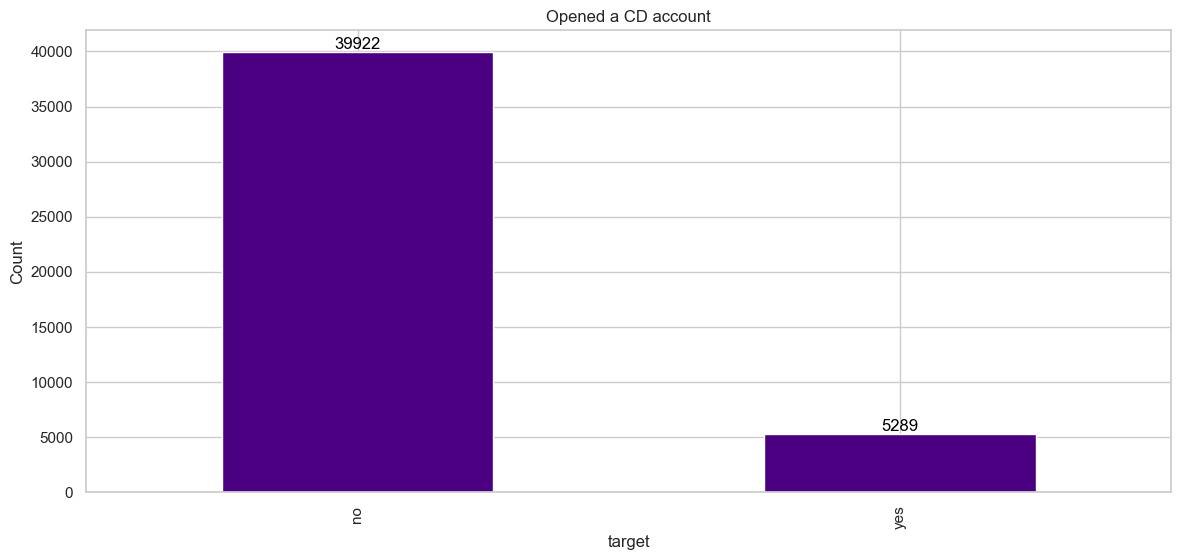

In [8]:
plt.figure(figsize = (14, 6))
ax = df['target'].value_counts().plot(kind = 'bar')
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha = 'center', va = 'bottom',
    fontsize = 12, color = 'black'
    )
plt.title('Opened a CD account')
plt.ylabel('Count')
plt.show()

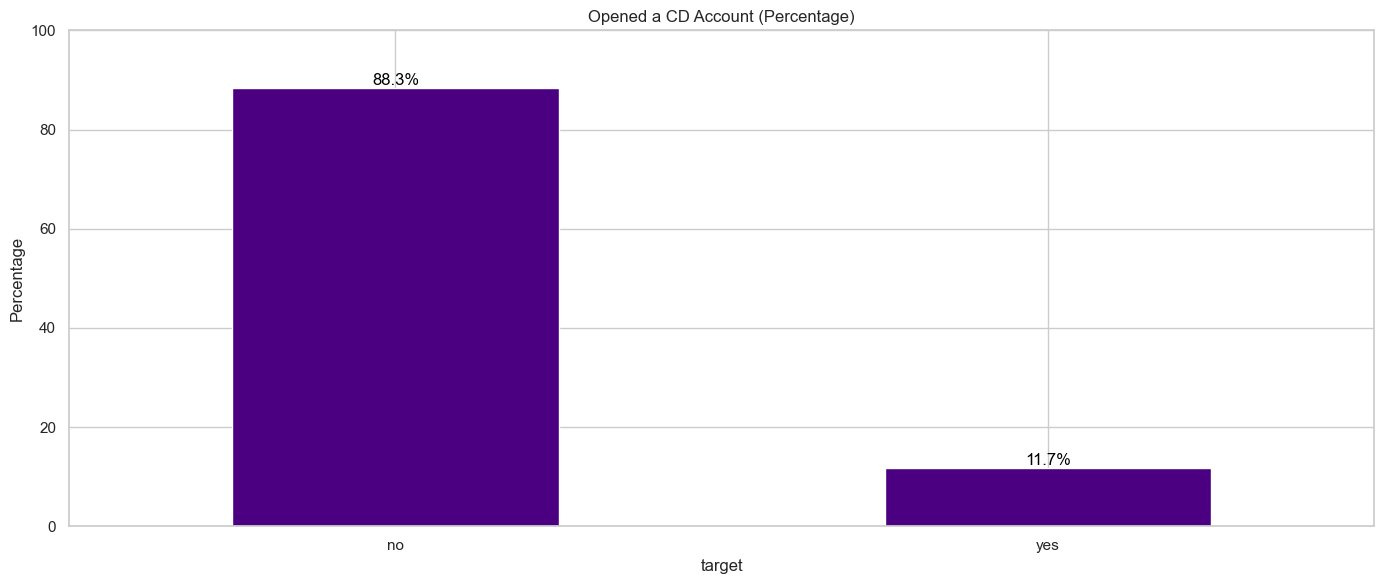

In [9]:
# Calculate percentage distribution
target_counts = df['target'].value_counts(normalize=True) * 100  # Convert to percentages

# Plot
plt.figure(figsize=(14, 6))
ax = target_counts.plot(kind='bar')

# Annotate each bar with percentage
for bar in ax.patches:
    percentage = bar.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (bar.get_x() + bar.get_width() / 2, percentage), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Opened a CD Account (Percentage)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Optional: lock y-axis to 100%
plt.tight_layout()
plt.show()

There are a significant number of no answers compared to yes answers showing a possible imbalance. An anaysis of further data must be done to show underlying trends with these answers in conjection with age, job description, balance, housing, loan status and education

# Univariate Analysis

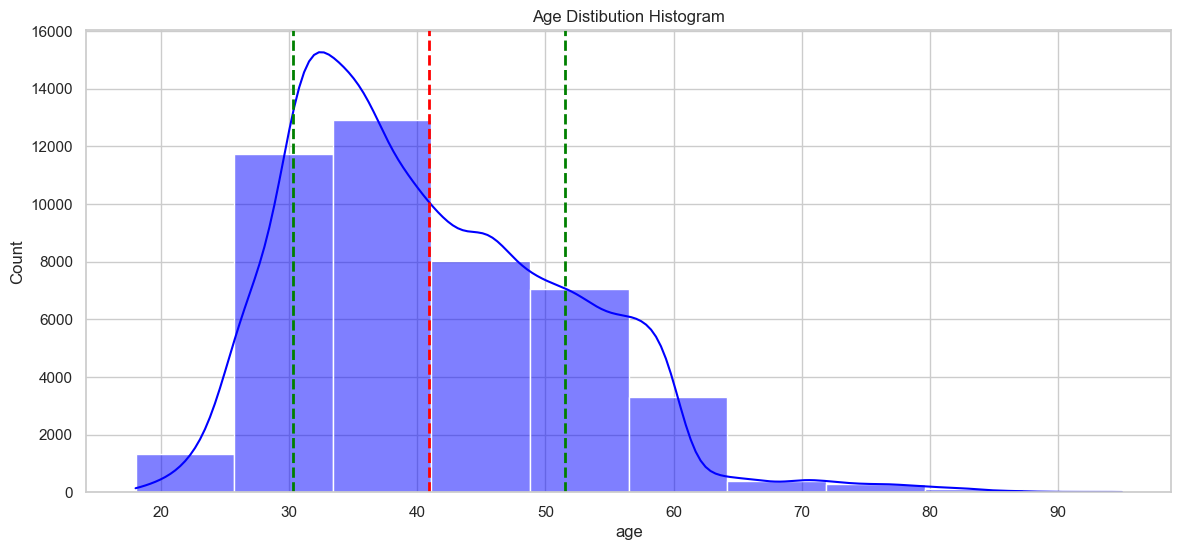

In [10]:
ageData = df['age']
mean = ageData.mean(numeric_only = True)
std = ageData.std(numeric_only = True)

plt.figure(figsize = (14, 6))
sns.histplot(data = ageData, bins = 10, kde = True, color = 'blue')
plt.title("Age Distibution Histogram")
plt.axvline(mean, color = 'red', linestyle = '--', linewidth = 2, label = 'Mean')
plt.axvline(mean + std, color = 'green', linestyle = '--', linewidth = 2, label = "+1 StD")
plt.axvline(mean - std, color = 'green', linestyle = '--', linewidth = 2, label = "-1 StD")

(-1000.0, 17500.0)

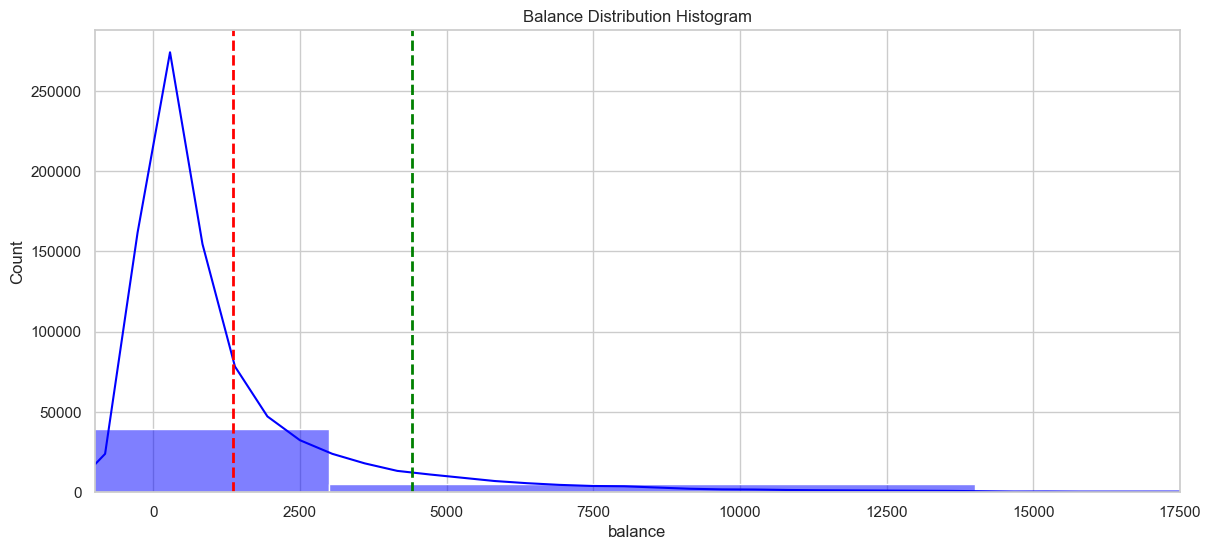

In [11]:
balData = df['balance']
balMean = balData.mean(numeric_only = True)
balstd = balData.std(numeric_only = True)

plt.figure(figsize = (14, 6))
sns.histplot(data = balData, bins = 10, kde = True, color = 'blue')
plt.title("Balance Distribution Histogram")
plt.axvline(balMean, color = 'red', linestyle = '--', linewidth = 2, label = 'Mean')
plt.axvline(balMean + balstd, color = 'green', linestyle = '--', linewidth = 2, label = "+1 StD")
plt.axvline(balMean - balstd, color = 'green', linestyle = '--', linewidth = 2, label = "-1 StD")
plt.xlim(-1000,17500)

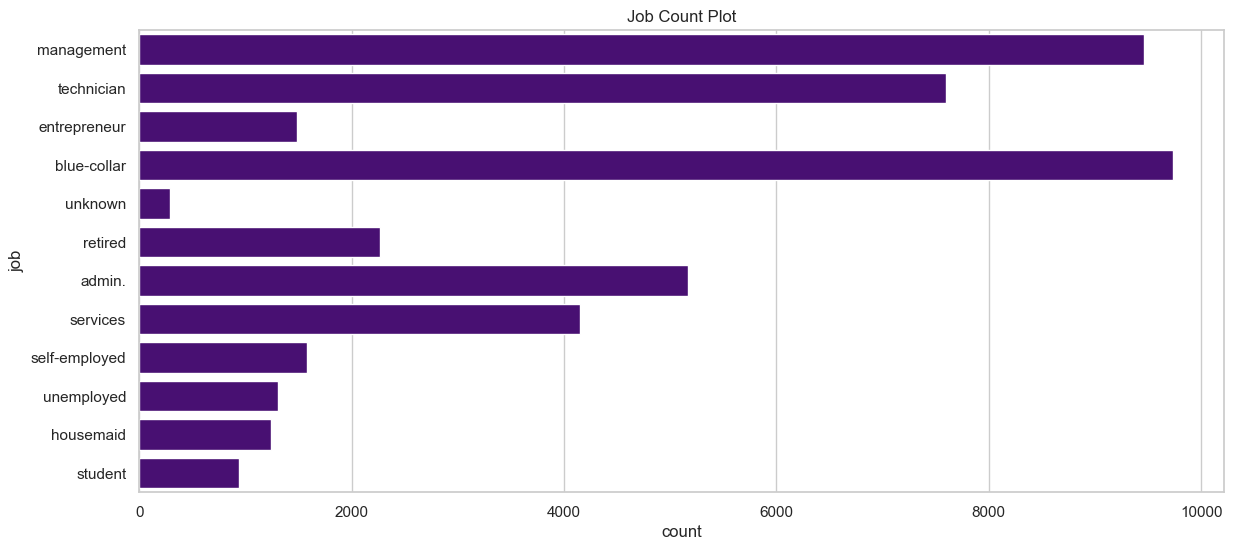

In [12]:
jobData = df['job']

plt.figure(figsize = (14, 6))
sns.countplot(data = jobData)
plt.title("Job Count Plot")
plt.show()

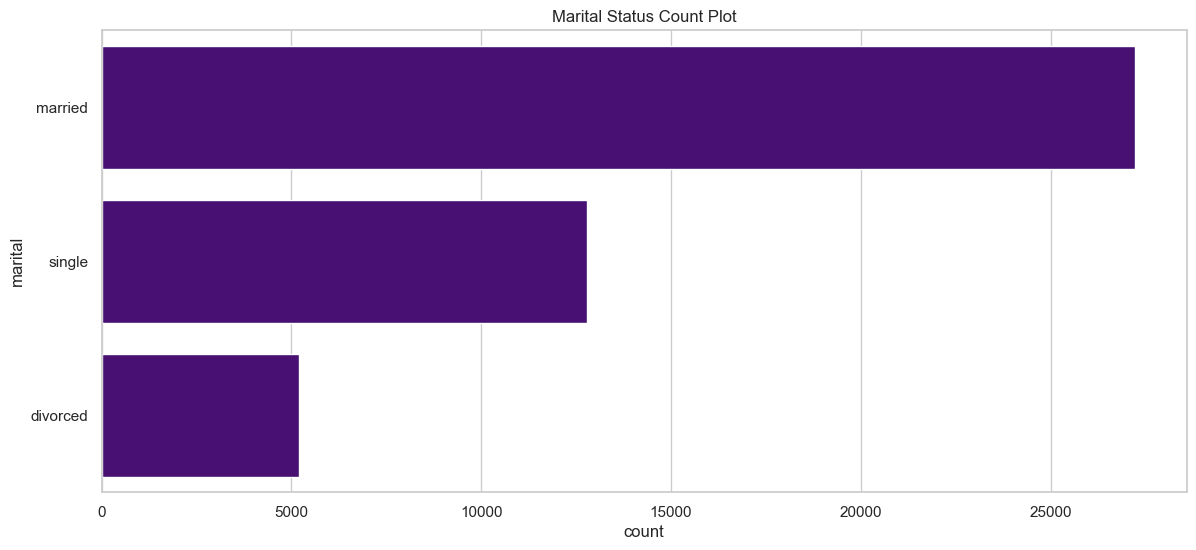

In [13]:
maritalData = df["marital"]

plt.figure(figsize = (14, 6))
sns.countplot(data = maritalData)
plt.title("Marital Status Count Plot")
plt.show()

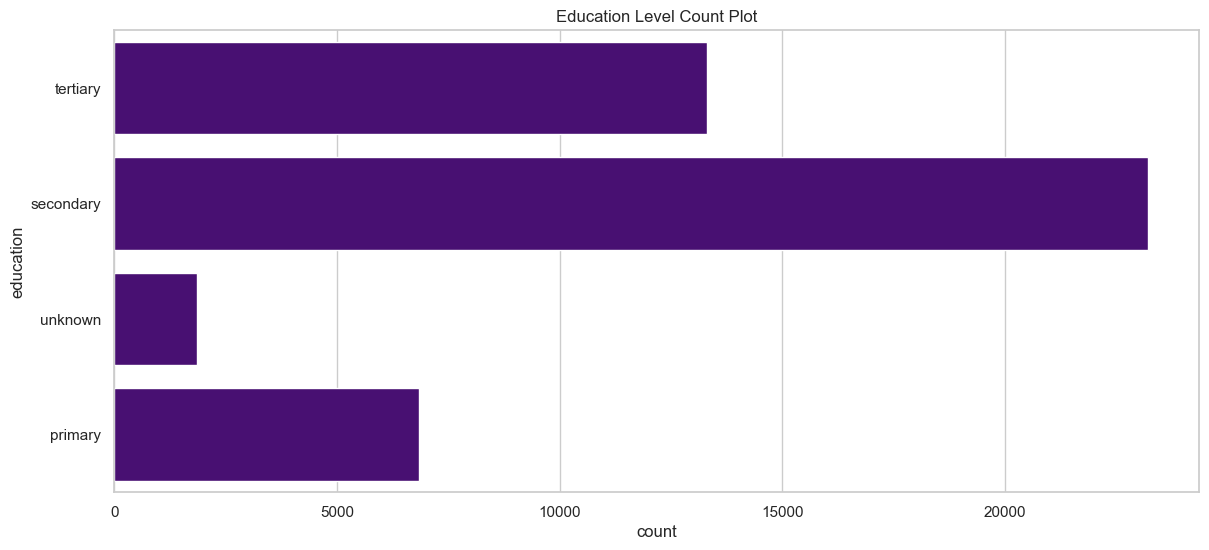

In [14]:
educationData = df["education"]

plt.figure(figsize = (14, 6))
sns.countplot(data = educationData)
plt.title("Education Level Count Plot")
plt.show()

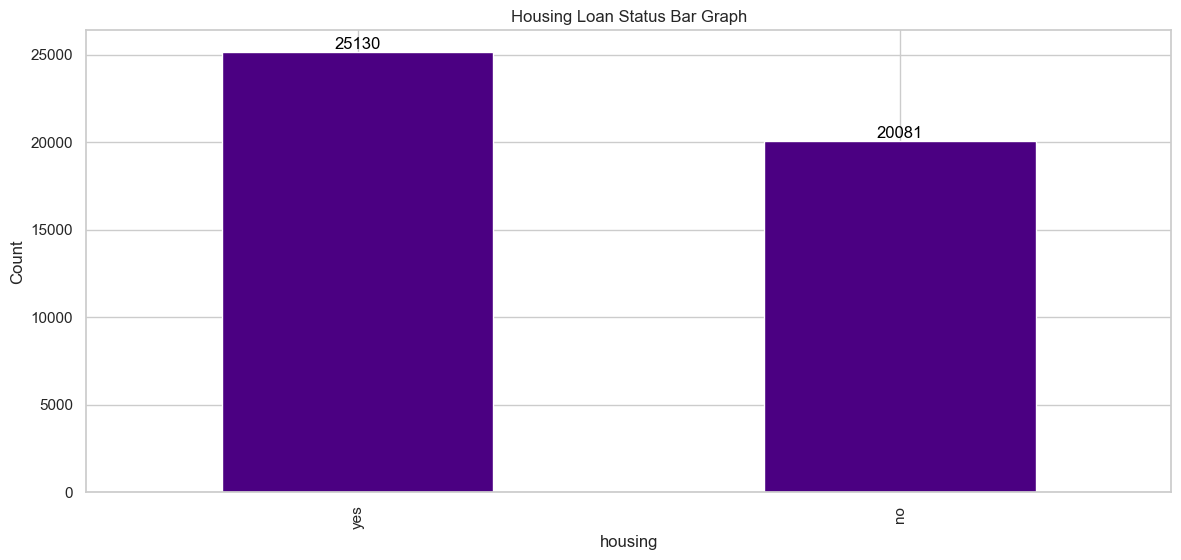

In [15]:
plt.figure(figsize = (14, 6))
ax = df["housing"].value_counts().plot(kind = 'bar')
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha = 'center', va = 'bottom',
        fontsize = 12, color = 'black'
    )
plt.title('Housing Loan Status Bar Graph')
plt.ylabel('Count')
plt.show()

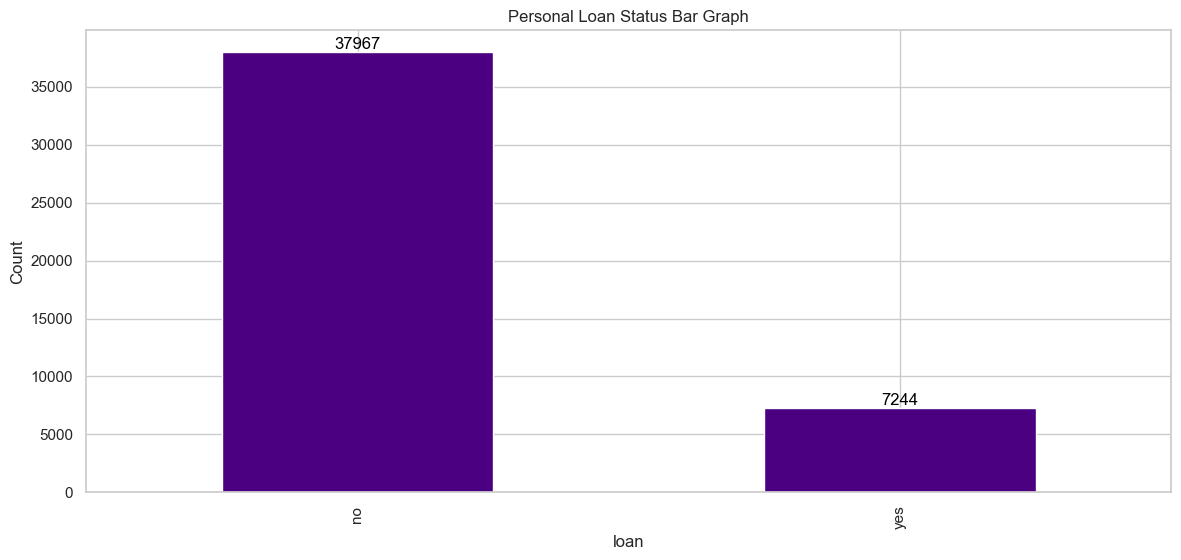

In [16]:
plt.figure(figsize = (14, 6))
ax = df["loan"].value_counts().plot(kind = "bar")
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha = 'center', va = 'bottom',
        fontsize = 12, color = 'black'
    )
plt.title('Personal Loan Status Bar Graph')
plt.ylabel('Count')
plt.show()

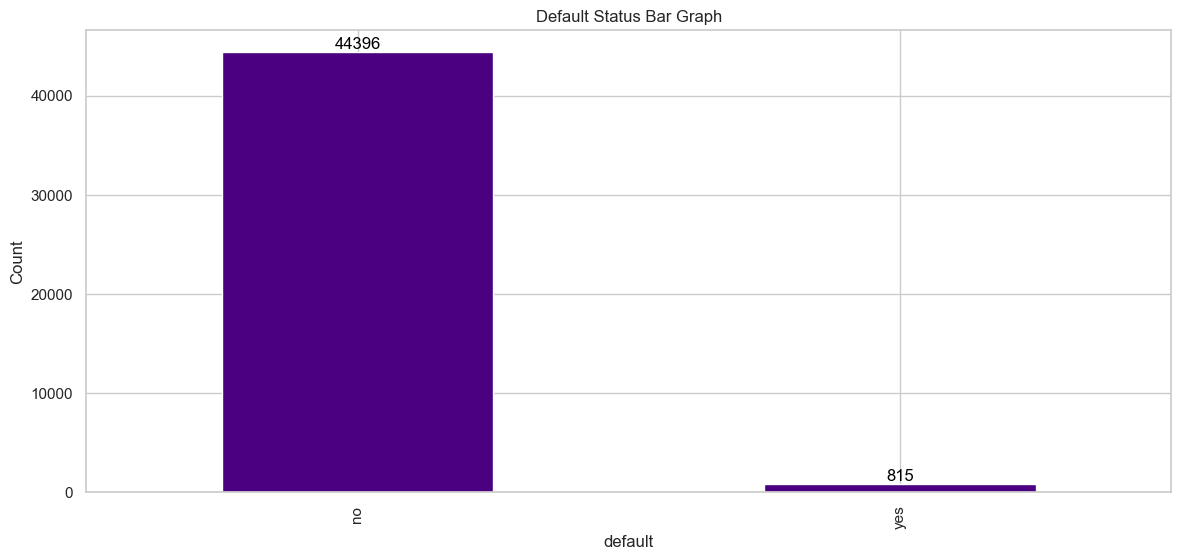

In [17]:
plt.figure(figsize = (14, 6))
ax = df["default"].value_counts().plot(kind = "bar")
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha = 'center', va = 'bottom',
        fontsize = 12, color = 'black'
    )
plt.title('Default Status Bar Graph')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

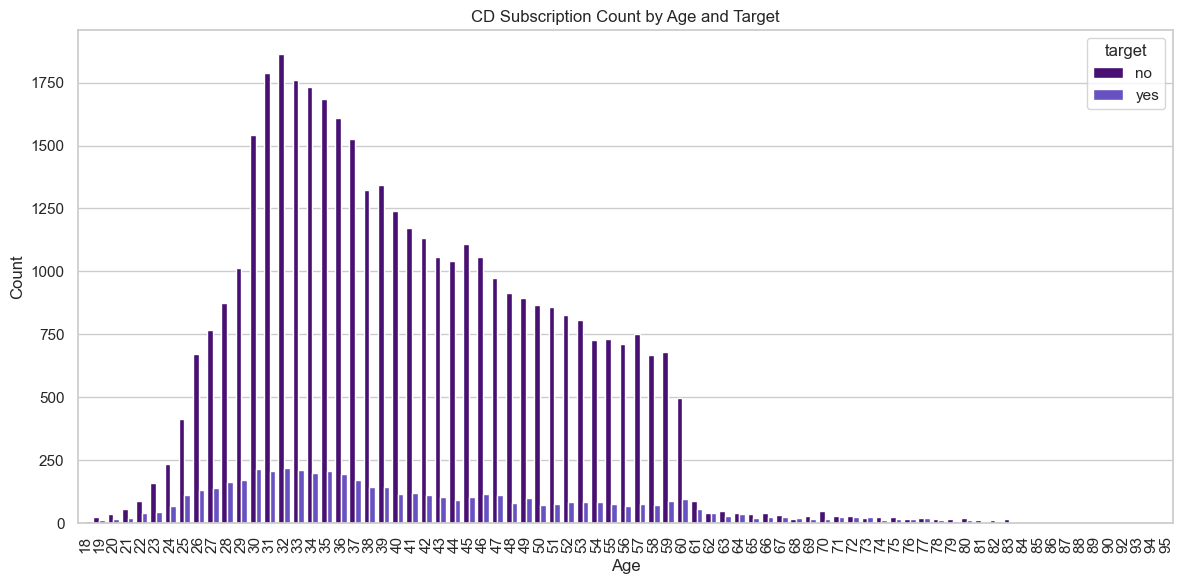

In [18]:
grouped = df.groupby(['age', 'target']).size().reset_index(name='count')

# Plot
plt.figure(figsize = (12, 6))
sns.barplot(data=grouped, x='age', y='count', hue='target')
plt.title('CD Subscription Count by Age and Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


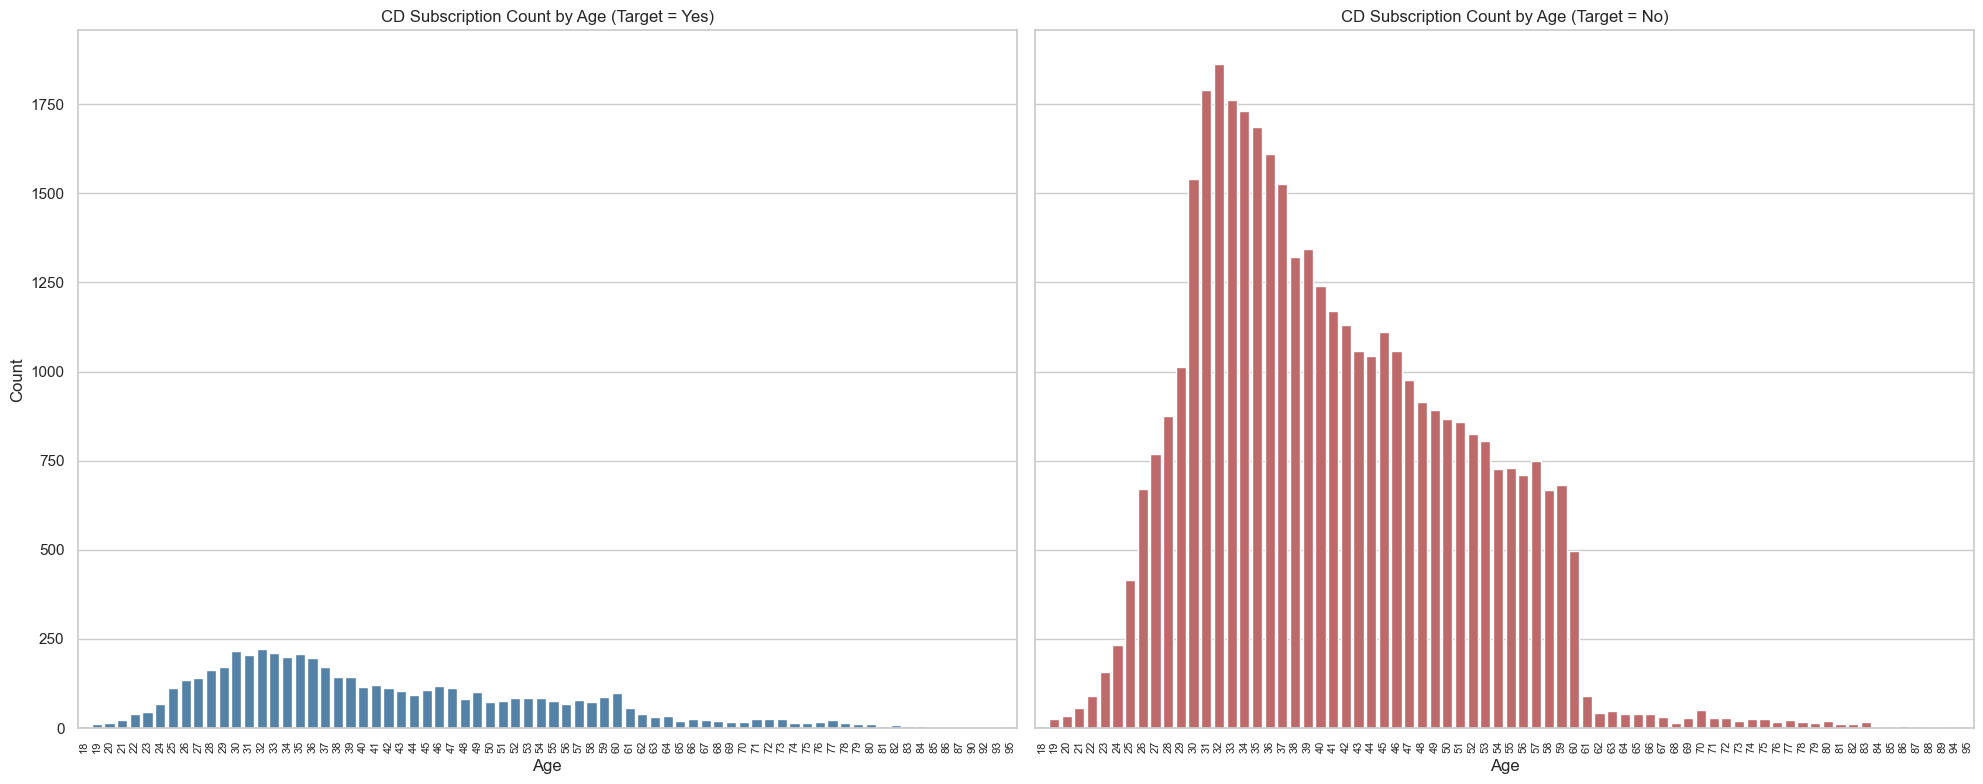

In [19]:
yes_data = grouped[grouped['target'] == 'yes']  # or 'yes' if it's a string
no_data = grouped[grouped['target'] == 'no']  # or 'no'

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Plot for target == True
sns.barplot(data=yes_data, x='age', y='count', ax=axes[0], color='steelblue')
axes[0].set_title('CD Subscription Count by Age (Target = Yes)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', labelrotation= 90, labelsize = 8)

# Plot for target == False
sns.barplot(data=no_data, x='age', y='count', ax=axes[1], color='indianred')
axes[1].set_title('CD Subscription Count by Age (Target = No)')
axes[1].set_xlabel('Age')
axes[1].tick_params(axis='x', labelrotation= 90, labelsize = 8)

plt.tight_layout()
plt.show()



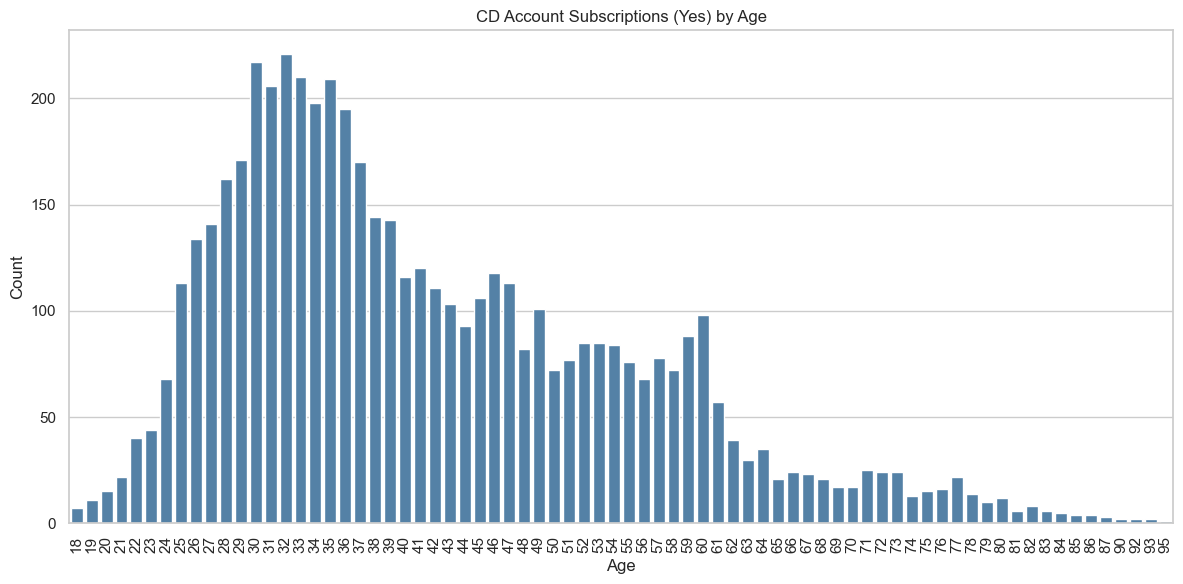

In [20]:
#yes_data = grouped[grouped['target'] == 'yes']  # or 'yes' if it's a string
plt.figure(figsize = (12, 6))
sns.barplot(data=yes_data, x='age', y='count', color='steelblue')
plt.title('CD Account Subscriptions (Yes) by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

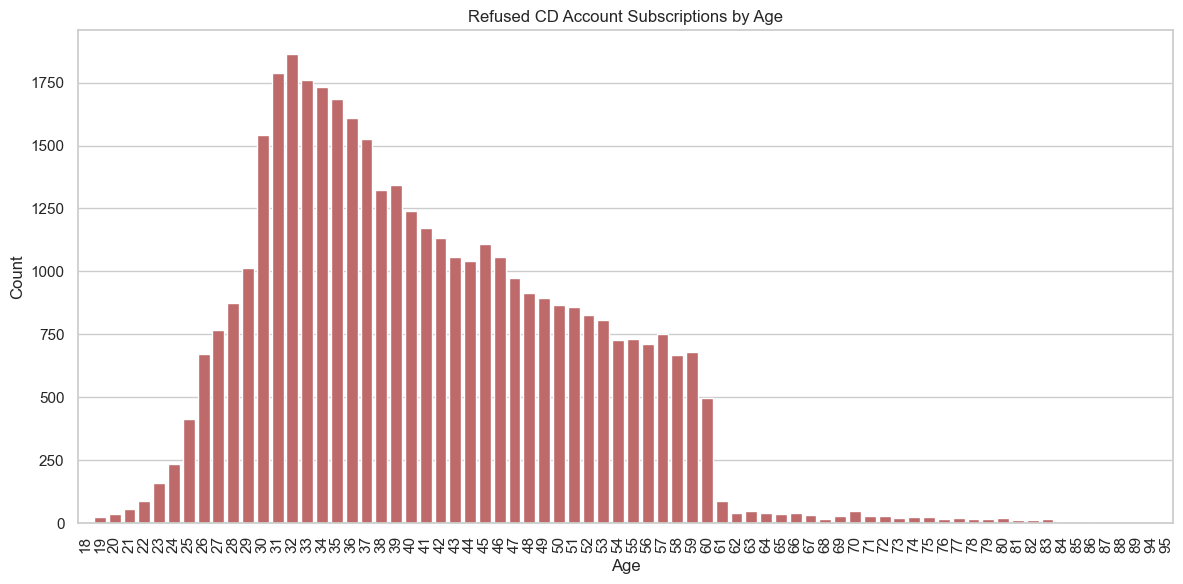

In [21]:
plt.figure(figsize = (12, 6))
sns.barplot(data=no_data, x='age', y='count', color='indianred')
plt.title('Refused CD Account Subscriptions by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

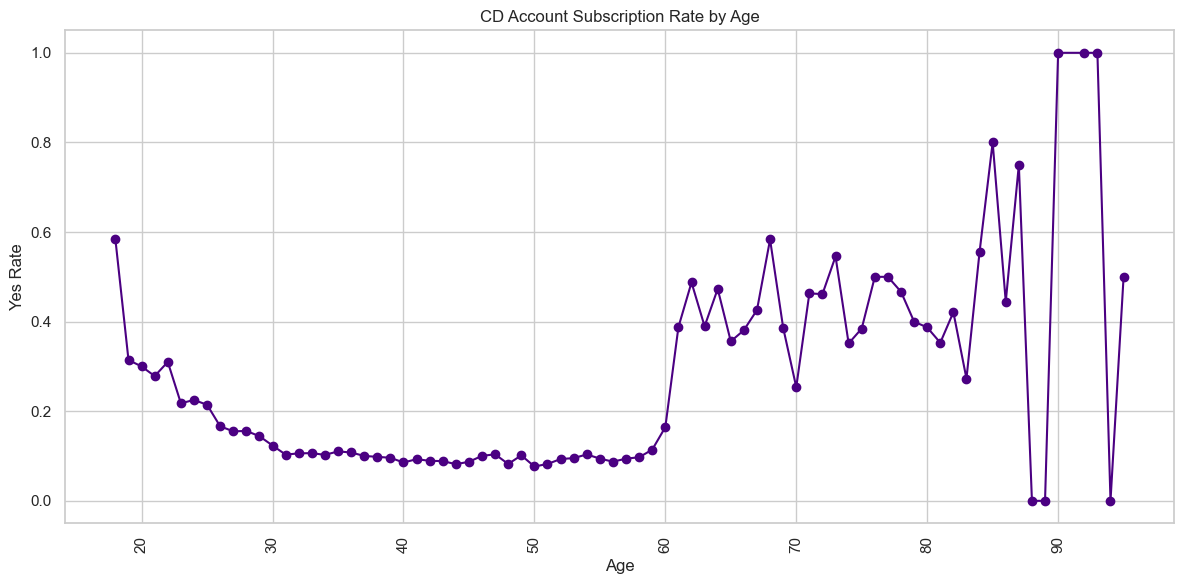

In [22]:
merged = pd.merge(yes_data, no_data, on='age', how='outer', suffixes=('_yes', '_no')).fillna(0)

# Calculate rate of 'yes' responses
merged['rate_yes'] = merged['count_yes'] / (merged['count_yes'] + merged['count_no'])

# Optional: sort by age if needed
merged = merged.sort_values(by='age')

# Display the rate array
rate_array = merged['rate_yes'].values
#print(rate_array)
plt.figure(figsize=(12, 6))
plt.plot(merged['age'], merged['rate_yes'], marker='o', linestyle='-')

plt.title('CD Account Subscription Rate by Age')
plt.xlabel('Age')
plt.ylabel('Yes Rate')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


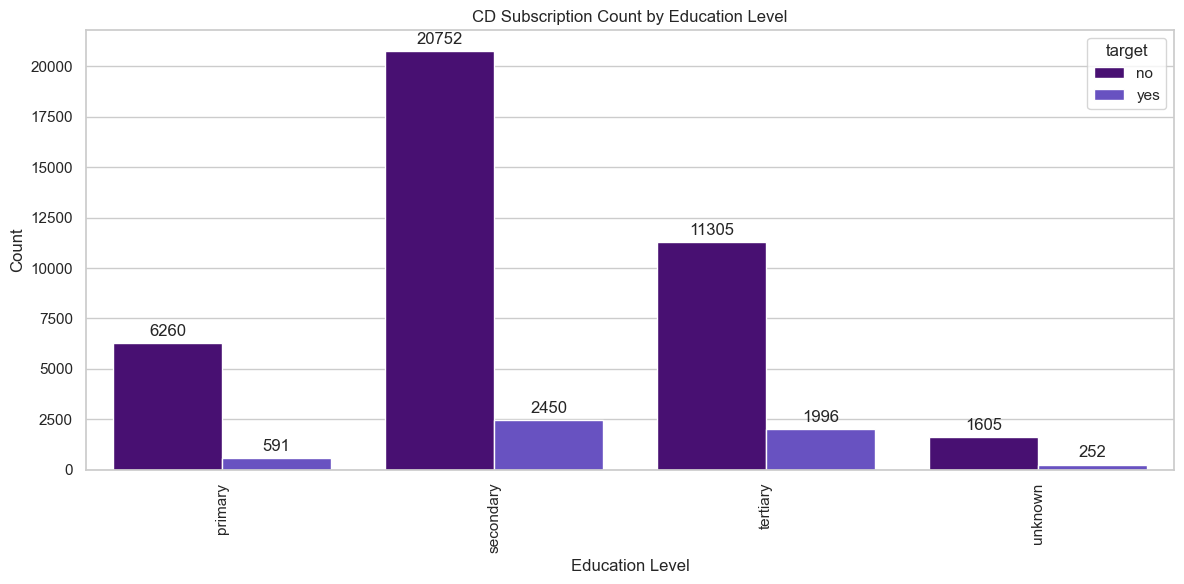

In [23]:
grouped = df.groupby(['education', 'target']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='education', y='count', hue='target')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final touches
plt.title('CD Subscription Count by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


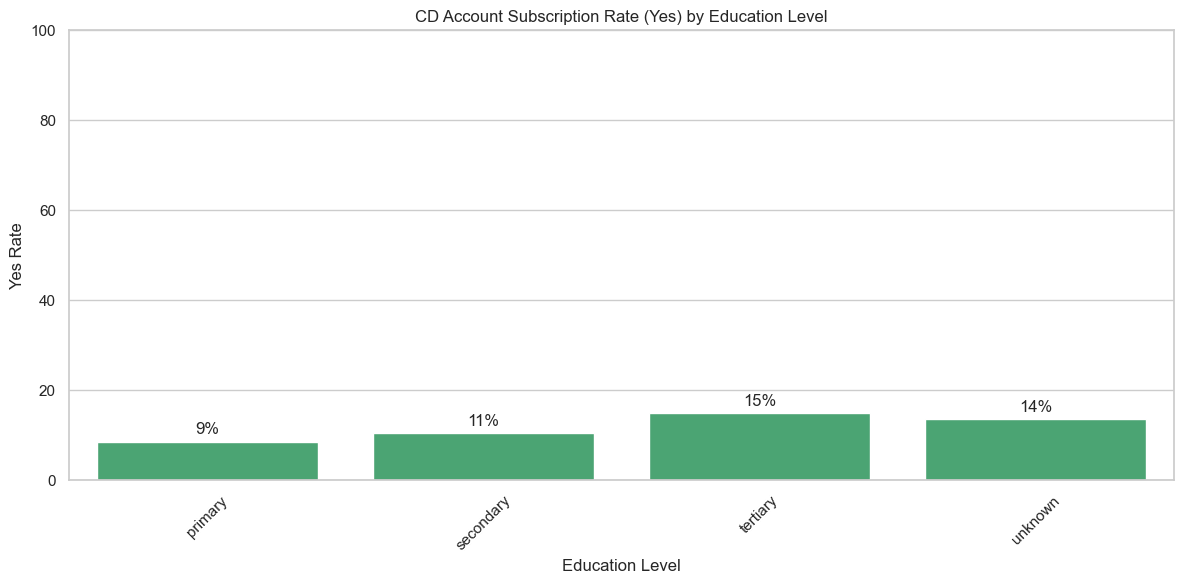

In [24]:
# Group and pivot the data
grouped = df.groupby(['education', 'target']).size().reset_index(name='count')
pivoted = grouped.pivot(index='education', columns='target', values='count').fillna(0)

# Calculate rate of 'yes' responses
pivoted['yes_rate'] = pivoted['yes'] / (pivoted['yes'] + pivoted['no'])
pivoted = pivoted.reset_index()


pivoted['yes_rate'] *= 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=pivoted, x='education', y='yes_rate', color='mediumseagreen')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', padding=3)

# Final touches
plt.title('CD Account Subscription Rate (Yes) by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Yes Rate')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



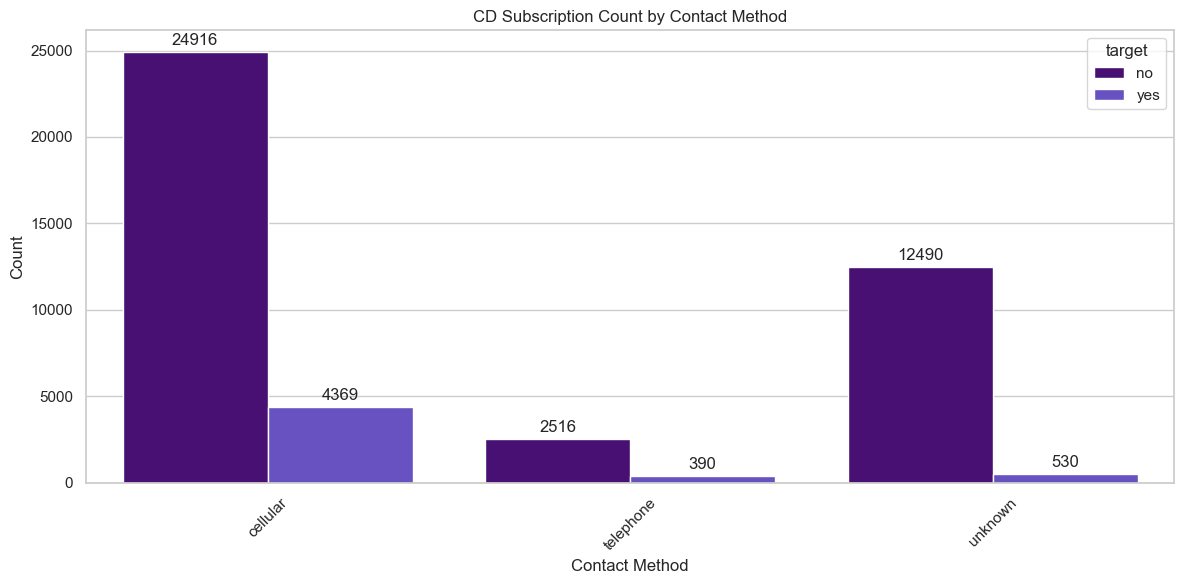

In [25]:
grouped = df.groupby(['contact', 'target']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='contact', y='count', hue='target')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final touches
plt.title('CD Subscription Count by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

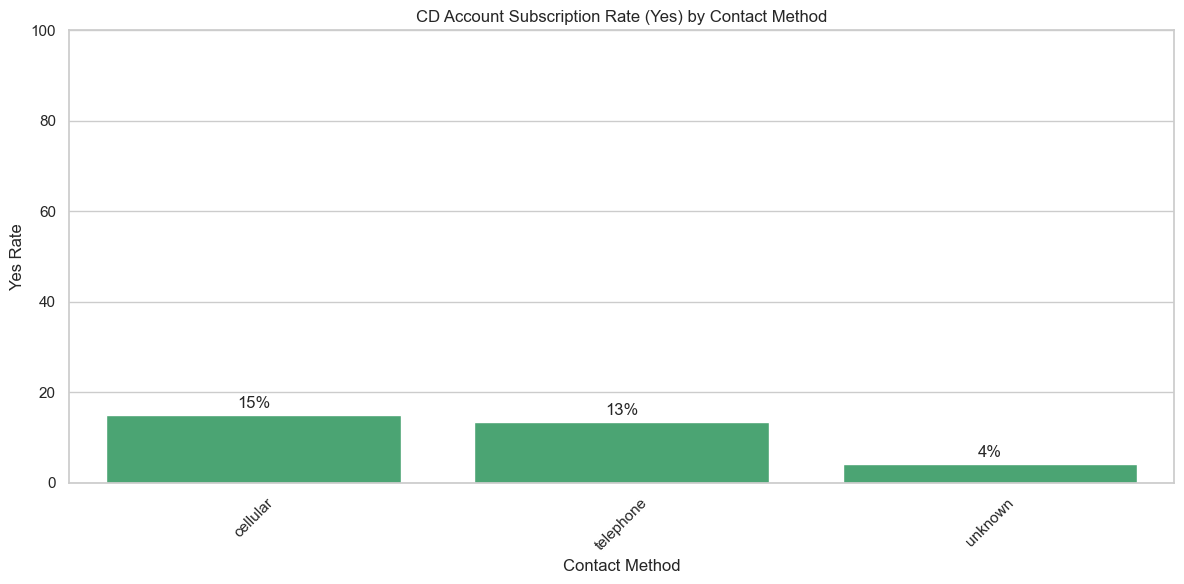

In [26]:
# Group and pivot the data
grouped = df.groupby(['contact', 'target']).size().reset_index(name='count')
pivoted = grouped.pivot(index='contact', columns='target', values='count').fillna(0)

# Calculate rate of 'yes' responses
pivoted['yes_rate'] = pivoted['yes'] / (pivoted['yes'] + pivoted['no'])
pivoted = pivoted.reset_index()


pivoted['yes_rate'] *= 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=pivoted, x='contact', y='yes_rate', color='mediumseagreen')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', padding=3)

# Final touches
plt.title('CD Account Subscription Rate (Yes) by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Yes Rate')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


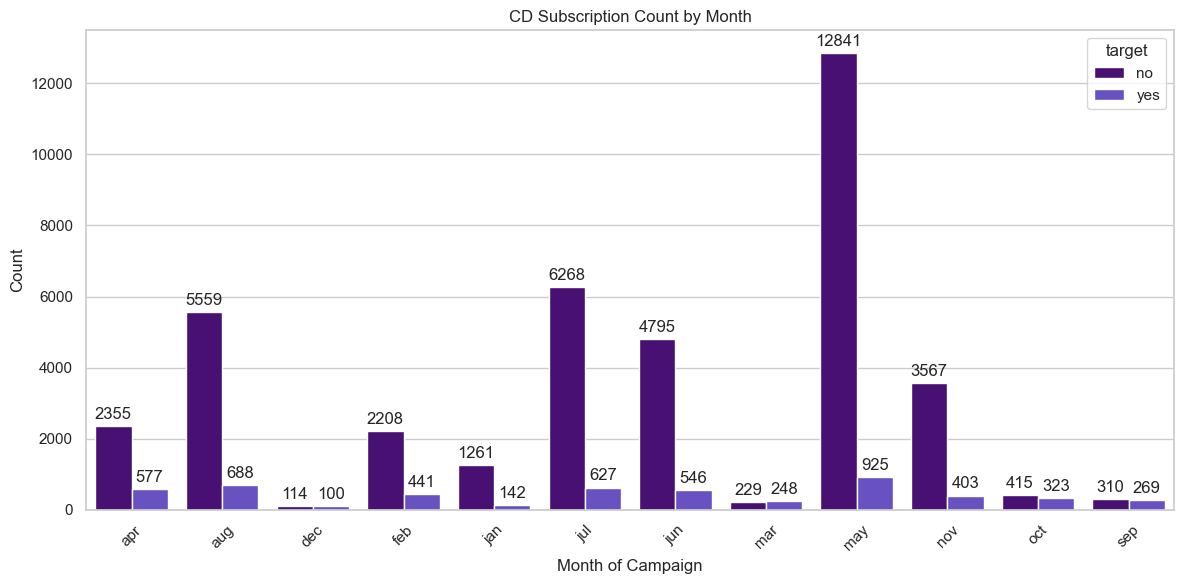

In [27]:
grouped = df.groupby(['month', 'target']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='month', y='count', hue='target')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final touches
plt.title('CD Subscription Count by Month')
plt.xlabel('Month of Campaign')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

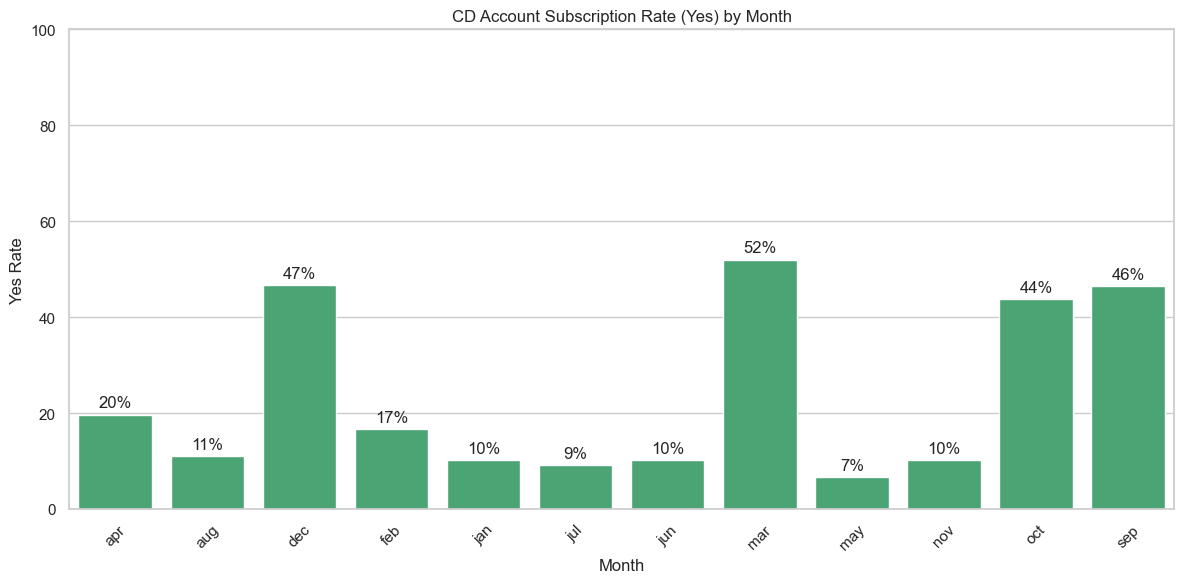

In [28]:
# Group and pivot the data
grouped = df.groupby(['month', 'target']).size().reset_index(name='count')
pivoted = grouped.pivot(index='month', columns='target', values='count').fillna(0)

# Calculate rate of 'yes' responses
pivoted['yes_rate'] = pivoted['yes'] / (pivoted['yes'] + pivoted['no'])
pivoted = pivoted.reset_index()


pivoted['yes_rate'] *= 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=pivoted, x='month', y='yes_rate', color='mediumseagreen')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', padding=3)

# Final touches
plt.title('CD Account Subscription Rate (Yes) by Month')
plt.xlabel('Month')
plt.ylabel('Yes Rate')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


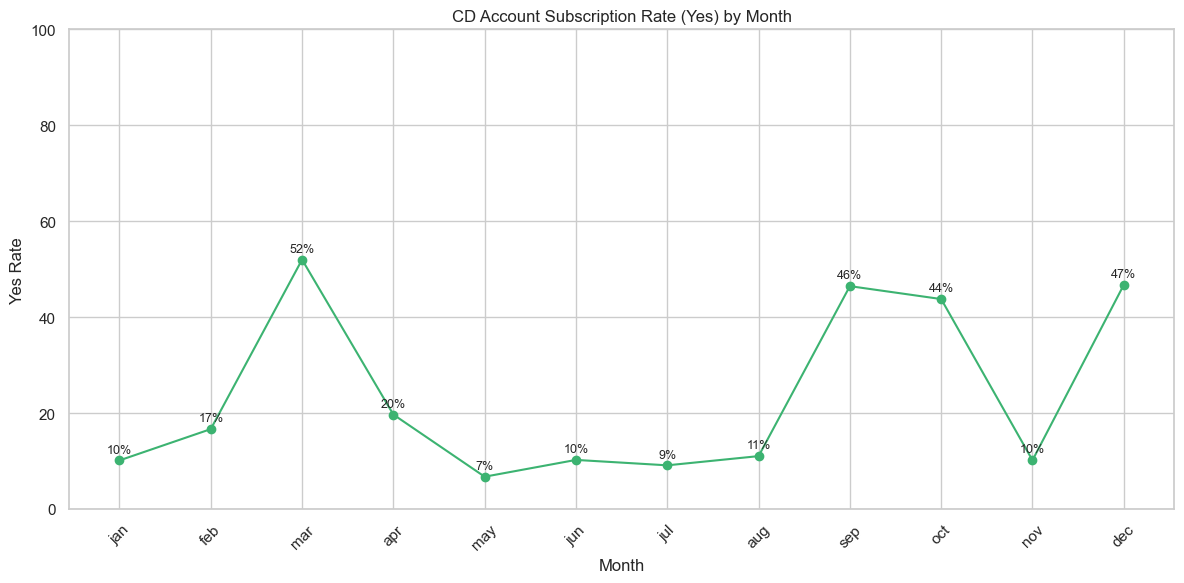

In [29]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
pivoted['month'] = pd.Categorical(pivoted['month'], categories=month_order, ordered=True)
pivoted = pivoted.sort_values('month')
plt.figure(figsize=(12, 6))
plt.plot(pivoted['month'], pivoted['yes_rate'], marker='o', linestyle='-', color='mediumseagreen')

# Add labels to each point
for x, y in zip(pivoted['month'], pivoted['yes_rate']):
    plt.text(x, y + 1, f'{y:.0f}%', ha='center', va='bottom', fontsize=9)

# Final touches
plt.title('CD Account Subscription Rate (Yes) by Month')
plt.xlabel('Month')
plt.ylabel('Yes Rate')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Frequency Crosstab: 
 target           no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


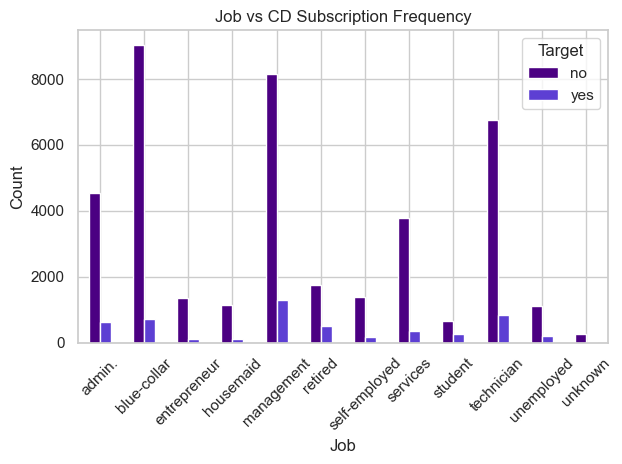

In [30]:
crossTabFreq = pd.crosstab(df['job'], df['target'])
print("Frequency Crosstab: \n", crossTabFreq)

crossTabFreq.plot(kind='bar')

# Customize the plot
plt.title('Job vs CD Subscription Frequency')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.tight_layout()


Normalized Crosstab: 
 target               no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056


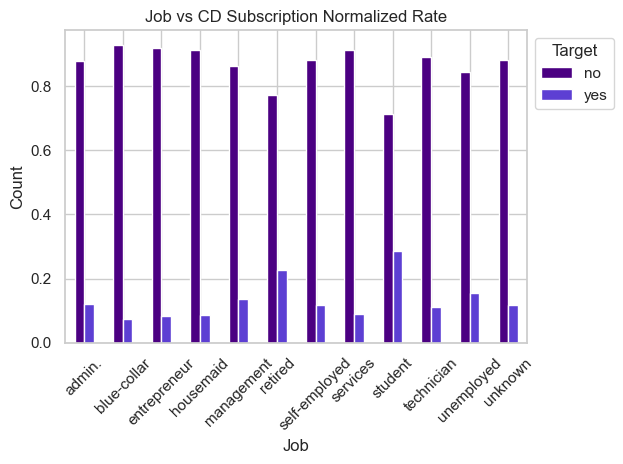

In [31]:
crossTabNorm = pd.crosstab(index = df['job'], columns = df['target'], normalize = 'index')
print("Normalized Crosstab: \n", crossTabNorm)

crossTabNorm.plot(kind='bar')

# Customize the plot
plt.title('Job vs CD Subscription Normalized Rate')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()


In [32]:
fig = px.box(df, x = 'balance', y = 'target')
fig.show()

# Correlation & Heatmaps

In [33]:
#encode the binary values 'default', 'housing', 'loan' and 'target'
if df['default'].isin(['yes', 'no']).any():
    df.loc[df['default'].isin(['yes', 'no']), 'default_bin_encoded'] = df['default'].map({'yes': 1, 'no': 0})

if df['housing'].isin(['yes', 'no']).any():
    df.loc[df['housing'].isin(['yes', 'no']), 'housing_bin_encoded'] = df['housing'].map({'yes': 1, 'no': 0})

if df['loan'].isin(['yes', 'no']).any():
    df.loc[df['loan'].isin(['yes', 'no']), 'loan_bin_encoded'] = df['loan'].map({'yes': 1, 'no': 0})

if df['target'].isin(['yes', 'no']).any():
    df.loc[df['target'].isin(['yes', 'no']), 'target_bin_encoded'] = df['target'].map({'yes': 1, 'no': 0})

df['default_bin_encoded'] = df['default_bin_encoded'].astype('Int64')
df['housing_bin_encoded'] = df['housing_bin_encoded'].astype('Int64')
df['loan_bin_encoded'] = df['loan_bin_encoded'].astype('Int64')
df['target_bin_encoded'] = df['target_bin_encoded'].astype('Int64')
df.head(8)

#Binary encoding and data preprocessing complete

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   

   contact  day  ... duration  campaign  pdays  previous  poutcome target  \
0  unknown    5  ...      261         1     -1         0   unknown     no   
1  unknown    5  ...      151         1     -1         0   unknown     no   
2  unknown    5  ...       76         1     -1         0   unknown     no   
3  unknown    5  ...       92         1     -1         0   unknown     no   
4  unknown    5  ...      198         1     -1         0   unknown     no   
5  unknown    5  ...      139         1     -1         0   unknown     no   
6  unknown    5  ...      217         1     -1         0   unknown     no   
7  unknown    5  ...      380         1     -1         0   unknown     no   

  default_bin_encoded  housing_bin_encoded  loan_bin_encoded  \
0                   0                    1                 0   
1                   0                    1                 0   
2                   0                    1                 1   
3                   0                    1                 0   
4                   0                    0                 0   
5                   0                    1                 0   
6                   0                    1                 1   
7                   1                    1                 0   

   target_bin_encoded  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
5                   0  
6                   0  
7                   0  

[8 rows x 21 columns]

# Binary encoding and data preprocessing complete


In [34]:
corrMatrix = df.corr(numeric_only=True)
print(corrMatrix)

                          age   balance       day  duration  campaign  \
age                  1.000000  0.097783 -0.009120 -0.004648  0.004760   
balance              0.097783  1.000000  0.004503  0.021560 -0.014578   
day                 -0.009120  0.004503  1.000000 -0.030206  0.162490   
duration            -0.004648  0.021560 -0.030206  1.000000 -0.084570   
campaign             0.004760 -0.014578  0.162490 -0.084570  1.000000   
pdays               -0.023758  0.003435 -0.093044 -0.001565 -0.088628   
previous             0.001288  0.016674 -0.051710  0.001203 -0.032855   
default_bin_encoded -0.017879 -0.066745  0.009424 -0.010021  0.016822   
housing_bin_encoded -0.185513 -0.068768 -0.027982  0.005075 -0.023599   
loan_bin_encoded    -0.015655 -0.084350  0.011370 -0.012412  0.009980   
target_bin_encoded   0.025155  0.052838 -0.028348  0.394521 -0.073172   

                        pdays  previous  default_bin_encoded  \
age                 -0.023758  0.001288            -0.01787

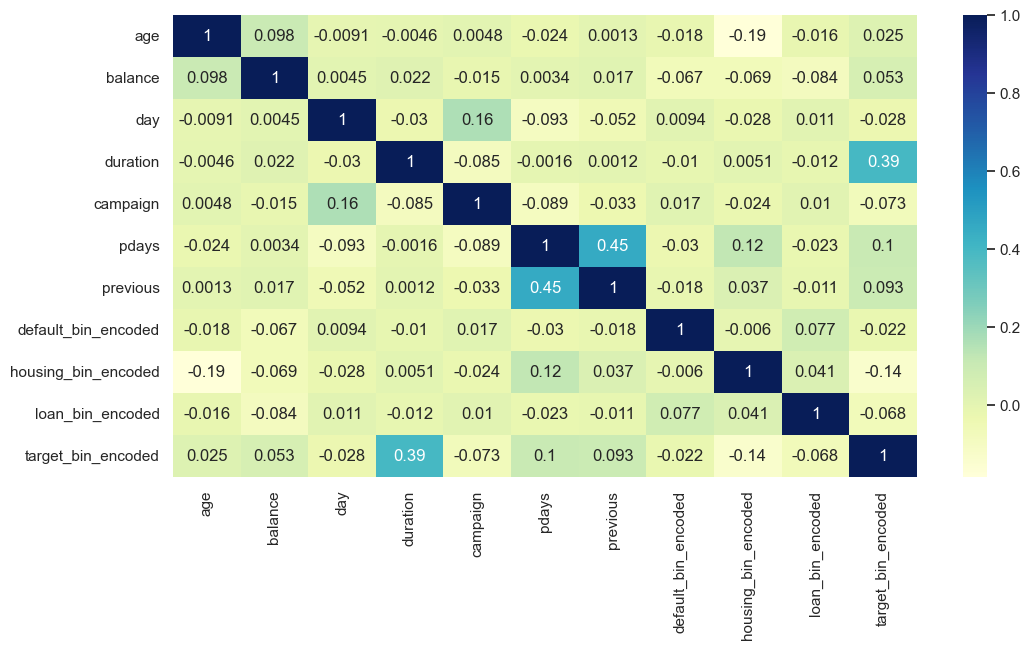

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)
plt.show()

# Hypothesis Testing with ANOVA and Chi-Square

ANOVA Hypothesis: <br> 
H0: Age or Balance do not have any significant impact on subscription rate to a CD account. <br>
H1: Age or Balance have a significant impact on subscription rate to a CD account.

In [36]:
fStatistic, pValue = stats.f_oneway(df['age'], df['balance'], df['target_bin_encoded'])
print("ANOVA Results: ")
print(f"F-statistic: {fStatistic:.3f}")
print(f"P-value: {pValue:.4f}")


ANOVA Results: 
F-statistic: 8785.625
P-value: 0.0000


This P-value result is highly significant. There is extremely strong evidence against the null hypothesis which we can reject. At least one group differs significantly from the others in terms of their mean values. An extremely large F statisitic shows there is a large between group variability the far outweighs the within-group variability, reinforcing the conclusion that the group means are not similar. <br> I will follow up this ANOVA with a Kruskal-Wallis for added confidence.

In [37]:
from scipy.stats import kruskal

hStatistic, pValue = kruskal(df['age'], df['balance'], df['target_bin_encoded'])
print("Kruskal-Wallis Test Results: ")
print(f"Kruskal-Wallis H-statistic: {hStatistic:.4f}")
print(f"P-value: {pValue:.4f}")


Kruskal-Wallis Test Results: 
Kruskal-Wallis H-statistic: 77114.6295
P-value: 0.0000


A P-value <= 0.0001 sends a clear signal that the group distributions are not similar, These results are highly statistically significant meaning it is not likely due to random chance. As the results confirm the ANOVA test. An H statistic that is this large suggests major diffrences as well. <br> A pariwise Mann-Whitney U test will be the next logical step to find which of these three groups is differing drastically.

In [38]:
from scipy.stats import mannwhitneyu

ageBalUstatistic, ageBalPvalue = mannwhitneyu(df['age'], df['balance'], alternative = 'two-sided')
ageTarUstat, ageTarPvalue = mannwhitneyu(df['age'], df['target_bin_encoded'], alternative = 'two-sided')
balTarUstat, balTarPvalue = mannwhitneyu(df['balance'], df['target_bin_encoded'], alternative = 'two-sided')

print("Age-Balance U test: ")
print(f"Mann-Whitney U statistic: {ageBalUstatistic}")
print(f"P-value: {ageBalPvalue:.4f}")
print("Age-Target U test: ")
print(f"Mann-Whitney U statistic: {ageTarUstat}")
print(f"P-value: {ageTarPvalue:.4f}")
print("Balance-Target U test: ")
print(f"Mann-Whitney U statistic: {balTarUstat}")
print(f"P-value: {balTarPvalue:.4f}")


Age-Balance U test: 
Mann-Whitney U statistic: 449586961.0
P-value: 0.0000
Age-Target U test: 
Mann-Whitney U statistic: 2044034521.0
P-value: 0.0000
Balance-Target U test: 
Mann-Whitney U statistic: 1784525717.5
P-value: 0.0000


Each pairwise comparison yields as p-value < 0.0001 meaning for every pair of groups the distribution difference is highly significant, showing that all groups differ from one another.

Finally a test to control false discovery rates will make sure there are no false positves and we can be confident in rejecting the null hypothesis which the ANOVA and Kruskal-Wallis test show significant evidence for.

In [39]:
from statsmodels.stats.multitest import multipletests

# Example: Raw p-values from multiple pairwise tests
raw_p_values = [ageBalPvalue, ageTarPvalue, balTarPvalue]

# Apply Benjamini-Hochberg FDR correction
reject, pvals_corrected, _, _ = multipletests(raw_p_values, alpha=0.05, method='fdr_bh')

# Output results
for i, (raw, adj, keep) in enumerate(zip(raw_p_values, pvals_corrected, reject), 1):
    print(f"Test {i}: Raw p = {raw:.5f}, FDR-adjusted p = {adj:.5f}, Reject Null: {keep}")

Test 1: Raw p = 0.00000, FDR-adjusted p = 0.00000, Reject Null: True
Test 2: Raw p = 0.00000, FDR-adjusted p = 0.00000, Reject Null: True
Test 3: Raw p = 0.00000, FDR-adjusted p = 0.00000, Reject Null: True


All findings hold up after correcting for multiple comparisons. All raw P-Values were highly significant and after applying an Benjamini-Hochberg FDR correction the adjusted p-values remain highly significant even under strict scrutiny. We have robust statistical support to confidently reject the null hypothesis.

Chi-Square Hypothesis: <br>
H0: Job description and marital status do not have any significant impact on who will subscribe to a CD account. <br>
H1: Job description  and marital status have a significant impact on who will subscribe to a CD account.

In [40]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['job'], df['target'])
print(contingency_table)


chi, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")


target           no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34
Chi-Square Statistic: 836.1055
p-value: 0.0000
Degrees of Freedom: 11


A Chi-Square statistic of 836.11 is very large, indicating there is a substantial divergence between observed and expected frequencies under the assumtion of no relationship. <br> With a P-value <= 0.0001 the result is highly statistically significant. <br> 11 degress of freedom shows the test has included 12 job categories x 2 target categories. <br>
There is thus a strong association between job type and the subscription to CD accounts meaning we can reject the null hypothesis on the grounds of job description as the distribution of "yes" and "no" is not random or uniform across all jobs. <br> For the marital status portion of the null hypothesis we must do another Chi-Square

In [41]:
contingency_table2 = pd.crosstab(df['marital'], df['target'])
print(contingency_table2)


chi2, p2, dof2, expected2 = chi2_contingency(contingency_table2)
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p2:.4f}")
print(f"Degrees of Freedom: {dof2}")

target       no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912
Chi-Square Statistic: 196.4959
p-value: 0.0000
Degrees of Freedom: 2


With a Chi-Square Statistic of 195.5 suggests that the observed counts deviate substantially from expected counts under the assumption of independence as the value is large. <br>
A P-Value < 0.0001 shows an extremely significant result. We can confidently reject the null hypothesis with this data as well as the previous Chi-Square. <br>
2 degrees of freedom as based on (rows - 1) x (columns - 1) = (3 - 1) x (2 - 1)

With both Chi-Squares showing significant evidence running post-hoc tests (Standardized Residuals) will be useful to confirm the results. 

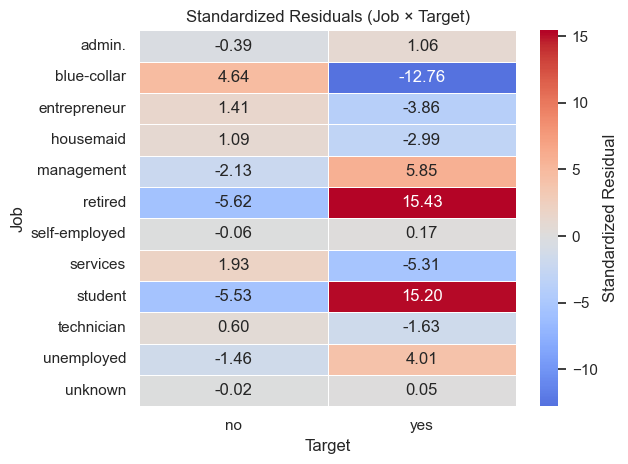

In [42]:
# Calculate standardized residuals
observed = contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)

# Convert to DataFrame for plotting
resid_df = pd.DataFrame(residuals, index=contingency_table.index, columns=contingency_table.columns)

sns.heatmap(resid_df, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, linecolor='white',
            cbar_kws={'label': 'Standardized Residual'})

plt.title("Standardized Residuals (Job × Target)")
plt.xlabel("Target")
plt.ylabel("Job")
plt.tight_layout()
plt.show()



This heatmap shows which job categories are contributing the most by spotlighting which job categories are over or under represented in the target outcome.

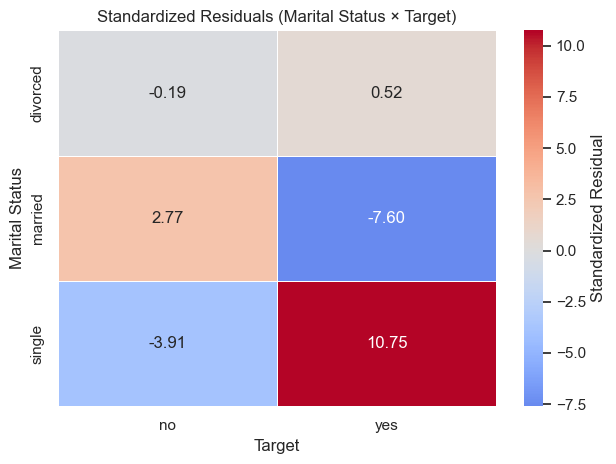

In [43]:
# Calculate standardized residuals
observed2 = contingency_table2.values
residuals2 = (observed2 - expected2) / np.sqrt(expected2)

# Convert to DataFrame for plotting
resid_df = pd.DataFrame(residuals2, index=contingency_table2.index, columns=contingency_table2.columns)

sns.heatmap(resid_df, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            linewidths=0.5, linecolor='white',
            cbar_kws={'label': 'Standardized Residual'})

plt.title("Standardized Residuals (Marital Status × Target)")
plt.xlabel("Target")
plt.ylabel("Marital Status")
plt.tight_layout()
plt.show()


This heatmap shows which marital statuses are contributing the most by spotlighting which marital status is over or under represented in the target outcome.

# Questions to Explore: 
1. Which job roles are more likely to subscribe? 
2. Does age influence subscription probability? 
3. Is there a best month or day to run a campaign? 
4. Do clients with a housing or personal loan behave differently? 
5. Does the number of contacts or duration improve subscription rate?

# Question 1

Frequency Crosstab: 
 target           no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


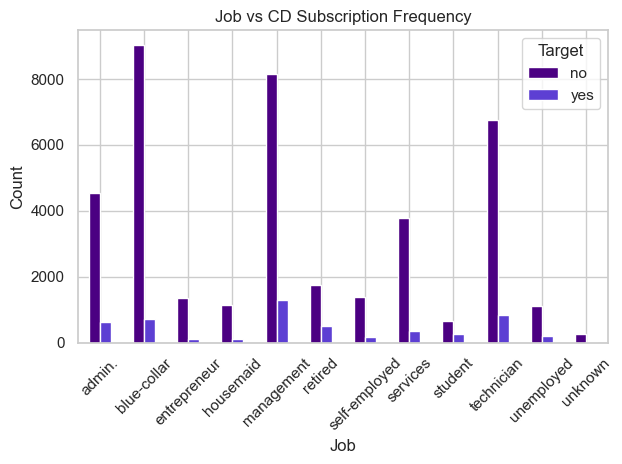

In [44]:
crossTabFreq = pd.crosstab(df['job'], df['target'])
print("Frequency Crosstab: \n", crossTabFreq)

crossTabFreq.plot(kind='bar')

# Customize the plot
plt.title('Job vs CD Subscription Frequency')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.tight_layout()

Normalized Crosstab: 
 target               no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056


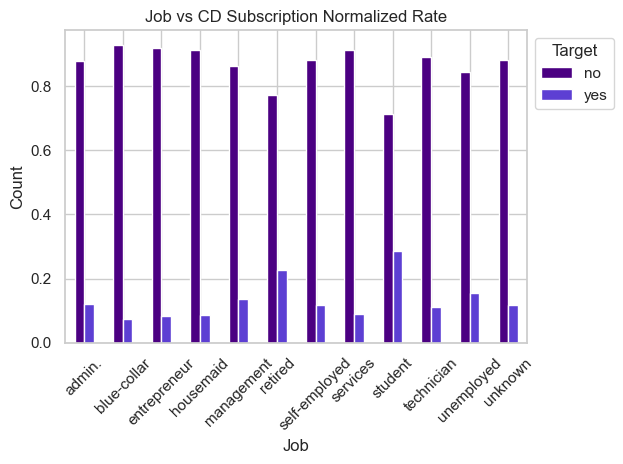

In [45]:
crossTabNorm = pd.crosstab(index = df['job'], columns = df['target'], normalize = 'index')
print("Normalized Crosstab: \n", crossTabNorm)

crossTabNorm.plot(kind='bar')

# Customize the plot
plt.title('Job vs CD Subscription Normalized Rate')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()


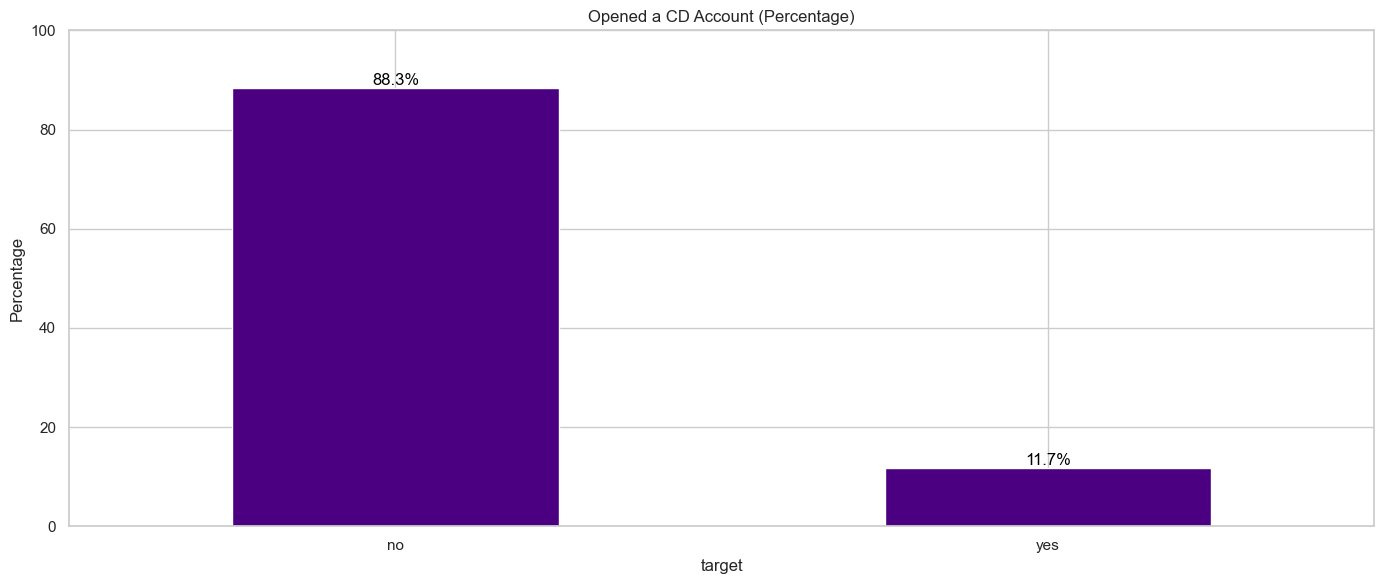

In [46]:
# Calculate percentage distribution
target_counts = df['target'].value_counts(normalize=True) * 100  # Convert to percentages

# Plot
plt.figure(figsize=(14, 6))
ax = target_counts.plot(kind='bar')

# Annotate each bar with percentage
for bar in ax.patches:
    percentage = bar.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (bar.get_x() + bar.get_width() / 2, percentage), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Opened a CD Account (Percentage)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Optional: lock y-axis to 100%
plt.tight_layout()
plt.show()

It can be seen from the last two cross tabs and grouped bar charts that those who are students or retired will subscribe to CD accounts at a slightly higher rate however it must be stressed by the frequency count that those two categories are under represented when compared to other job titles. 

# Question 2

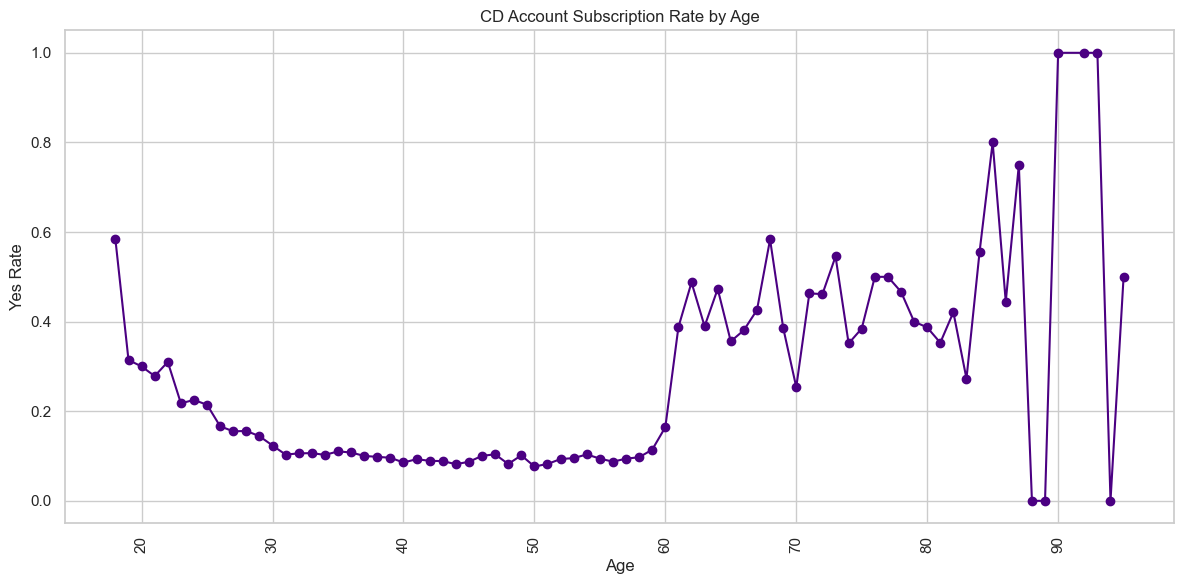

In [47]:
merged = pd.merge(yes_data, no_data, on='age', how='outer', suffixes=('_yes', '_no')).fillna(0)

# Calculate rate of 'yes' responses
merged['rate_yes'] = merged['count_yes'] / (merged['count_yes'] + merged['count_no'])

# Optional: sort by age if needed
merged = merged.sort_values(by='age')

# Display the rate array
rate_array = merged['rate_yes'].values
#print(rate_array)
plt.figure(figsize=(12, 6))
plt.plot(merged['age'], merged['rate_yes'], marker='o', linestyle='-')

plt.title('CD Account Subscription Rate by Age')
plt.xlabel('Age')
plt.ylabel('Yes Rate')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


This line chart answers question 2 as it can clearly be seen that from ages 60 onward have a much higher rate of subscribing to a CD account than the population as a whole. There are notable outlyers at 18, 88-89 and 93. 88, 89 and 93 are from the fact that no one within this data set was that specific age.

# Question 3

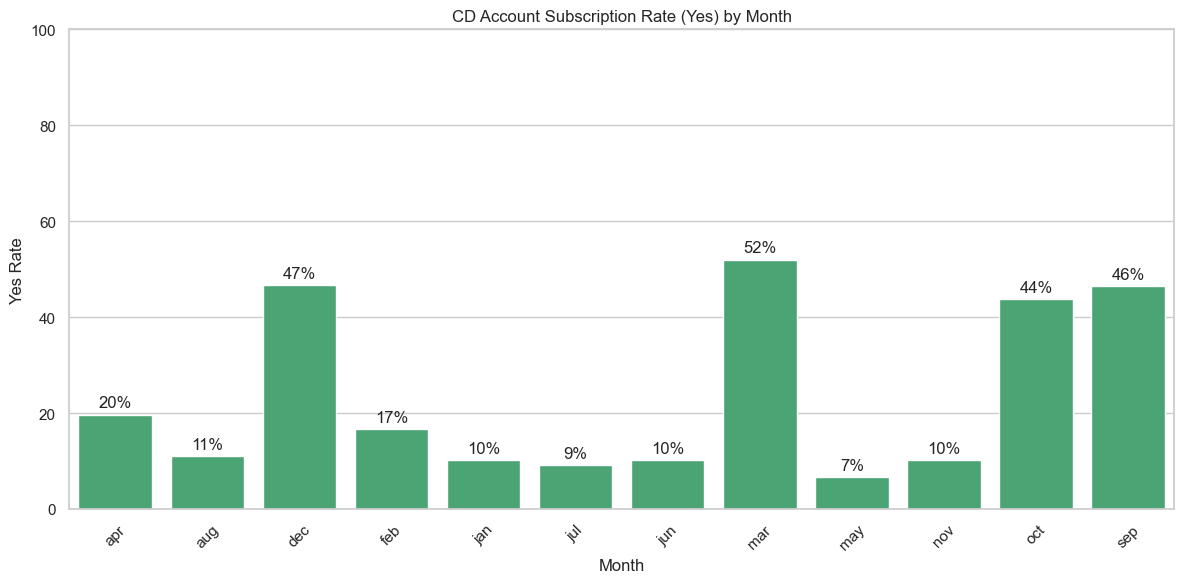

In [48]:
# Group and pivot the data
grouped = df.groupby(['month', 'target']).size().reset_index(name='count')
pivoted = grouped.pivot(index='month', columns='target', values='count').fillna(0)

# Calculate rate of 'yes' responses
pivoted['yes_rate'] = pivoted['yes'] / (pivoted['yes'] + pivoted['no'])
pivoted = pivoted.reset_index()


pivoted['yes_rate'] *= 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=pivoted, x='month', y='yes_rate', color='mediumseagreen')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', padding=3)

# Final touches
plt.title('CD Account Subscription Rate (Yes) by Month')
plt.xlabel('Month')
plt.ylabel('Yes Rate')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart answers part of question three showing that certain months do in fact have higher rates of CD subscriptions than others. December, March, October and September have the highest rates. It must be noted however that the months with the higher subscription rates do not in fact have the same frequencies of attempts than months with lower rates as shown in the next chart.

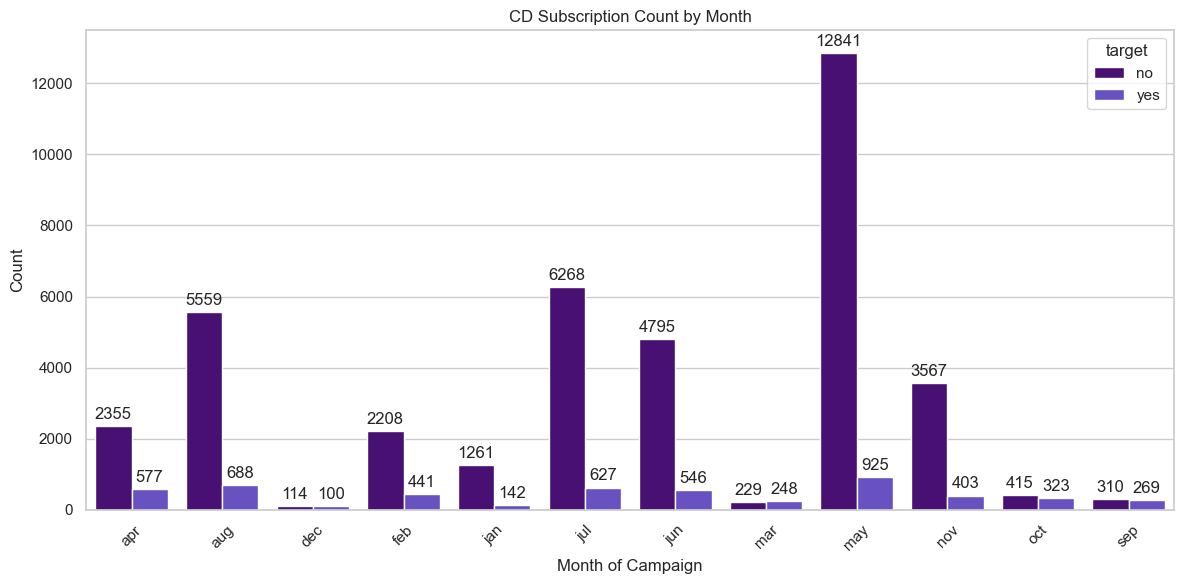

In [49]:
grouped = df.groupby(['month', 'target']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='month', y='count', hue='target')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final touches
plt.title('CD Subscription Count by Month')
plt.xlabel('Month of Campaign')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As for which day of the month is most sucessful for gaining CD account subscriptions further analysis must be done.

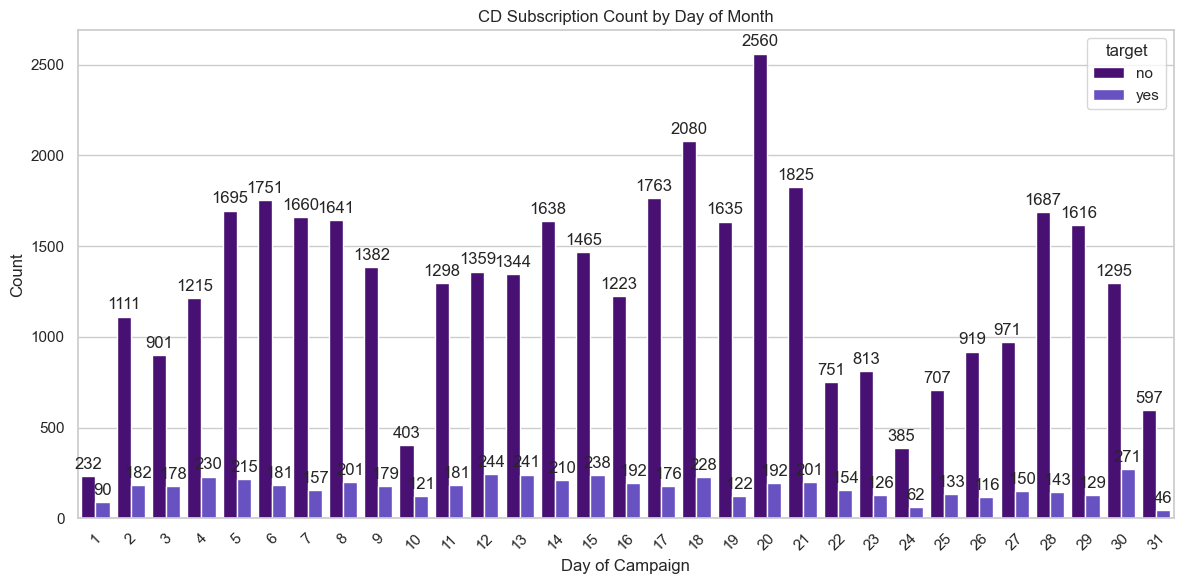

In [50]:
grouped = df.groupby(['day', 'target']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='day', y='count', hue='target')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final touches
plt.title('CD Subscription Count by Day of Month')
plt.xlabel('Day of Campaign')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

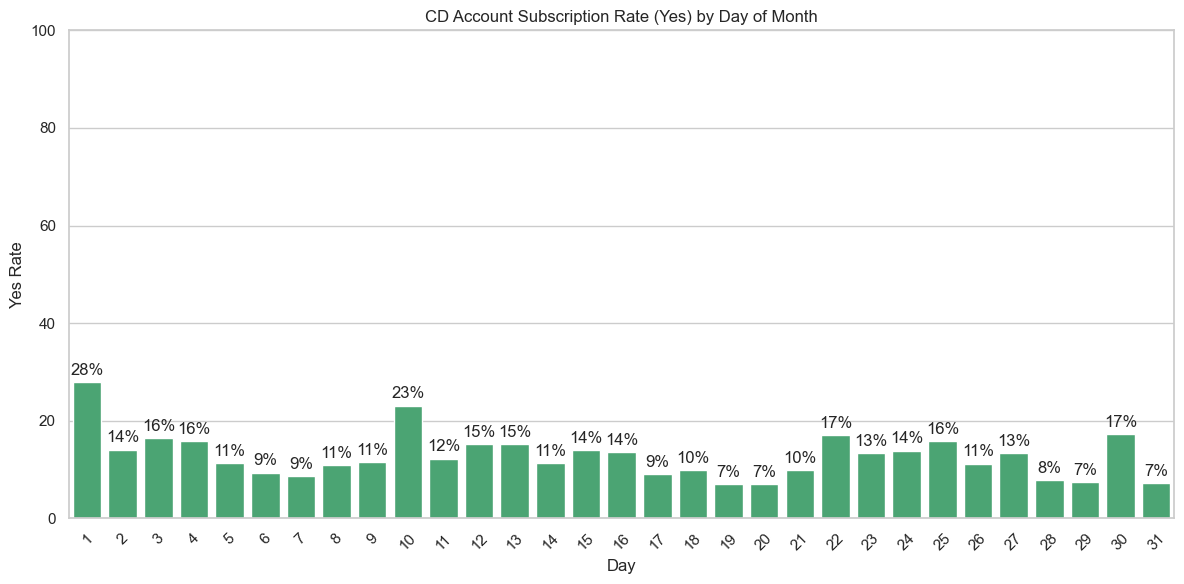

In [51]:
# Group and pivot the data
grouped = df.groupby(['day', 'target']).size().reset_index(name='count')
pivoted = grouped.pivot(index='day', columns='target', values='count').fillna(0)

# Calculate rate of 'yes' responses
pivoted['yes_rate'] = pivoted['yes'] / (pivoted['yes'] + pivoted['no'])
pivoted = pivoted.reset_index()


pivoted['yes_rate'] *= 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=pivoted, x='day', y='yes_rate', color='mediumseagreen')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', padding=3)

# Final touches
plt.title('CD Account Subscription Rate (Yes) by Day of Month')
plt.xlabel('Day')
plt.ylabel('Yes Rate')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows that the first and tenth of each month seem to have higher rates of success for CD account subscriptions, however again it must be noted that the previous chart shows that the first and tenth also have a much lower overall frequency of attempts than most of the other days.

# Question 4

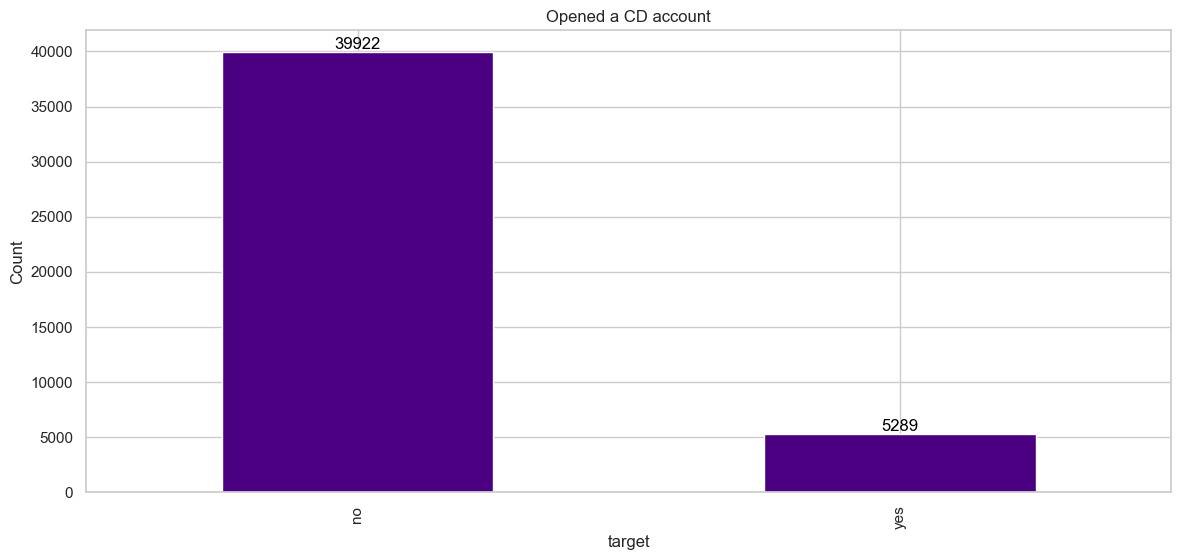

In [52]:
plt.figure(figsize = (14, 6))
ax = df['target'].value_counts().plot(kind = 'bar')
for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha = 'center', va = 'bottom',
    fontsize = 12, color = 'black'
    )
plt.title('Opened a CD account')
plt.ylabel('Count')
plt.show()

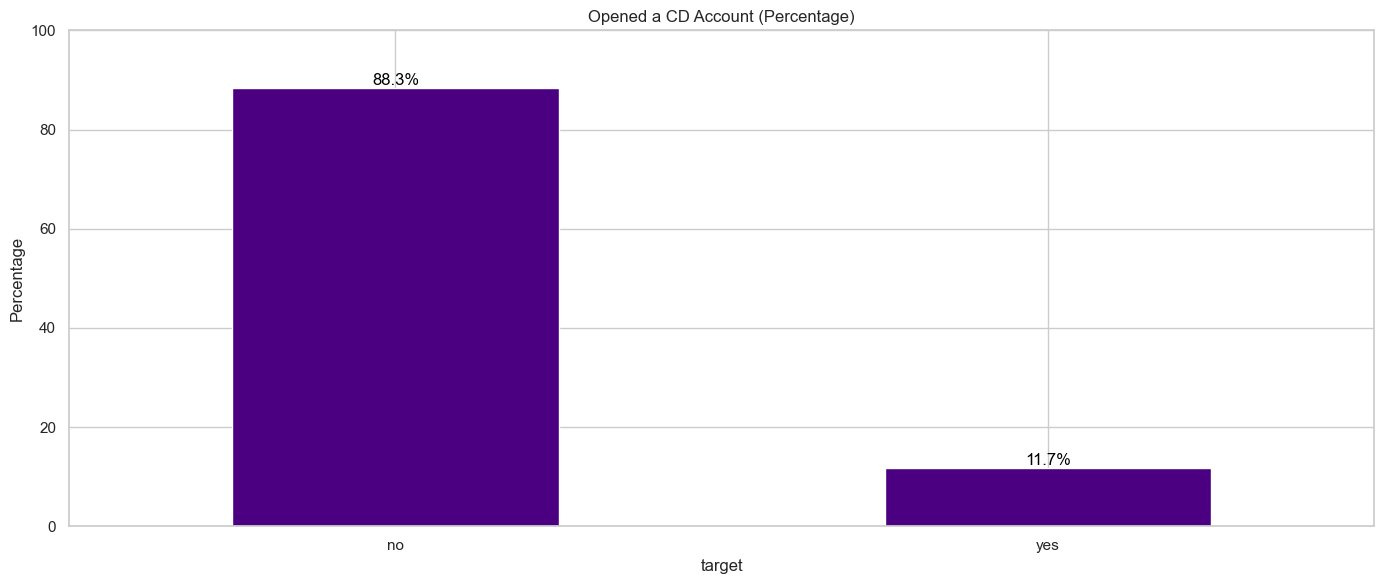

In [53]:
# Calculate percentage distribution
target_counts = df['target'].value_counts(normalize=True) * 100  # Convert to percentages

# Plot
plt.figure(figsize=(14, 6))
ax = target_counts.plot(kind='bar')

# Annotate each bar with percentage
for bar in ax.patches:
    percentage = bar.get_height()
    ax.annotate(f'{percentage:.1f}%', 
                (bar.get_x() + bar.get_width() / 2, percentage), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.title('Opened a CD Account (Percentage)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Optional: lock y-axis to 100%
plt.tight_layout()
plt.show()

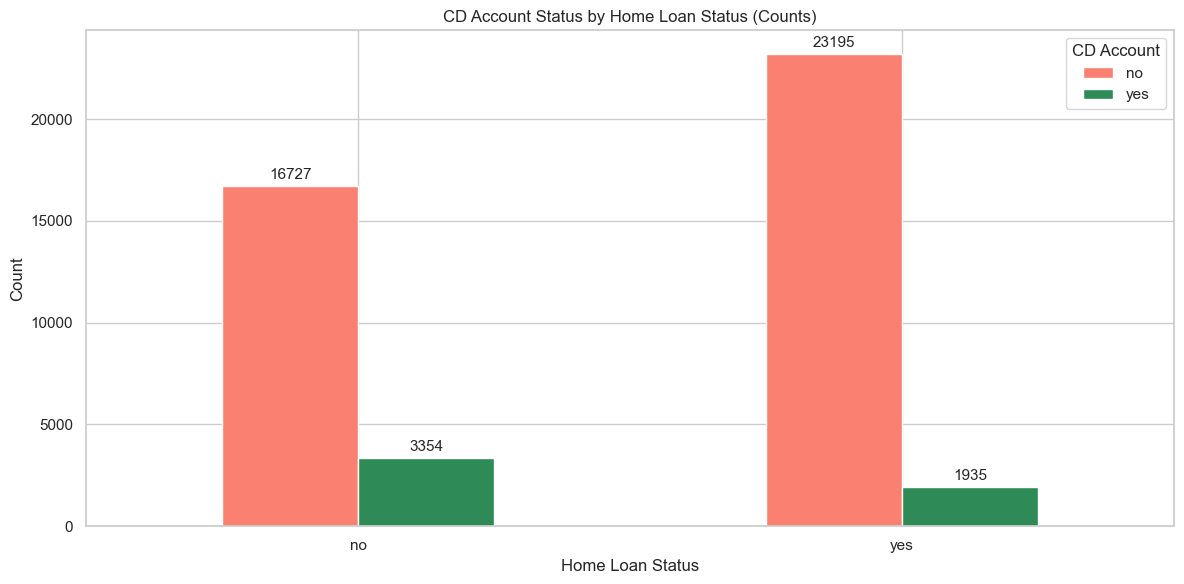

In [54]:
import warnings
import builtins  # Optional, for completeness
warnings.filterwarnings("ignore", category=SyntaxWarning)

# Step 1: Create a new column combining CD account and loan status
df['cd_home_loan_group'] = df['target'] + ' | ' + df['housing']

# Step 2: Count occurrences of each combination
group_counts = df['cd_home_loan_group'].value_counts().sort_index()

# Step 3: Prepare data for grouped bar chart
group_df = group_counts.reset_index()
group_df.columns = ['Group', 'Count']

# Split into two columns: CD status and Loan status
group_df[['CD_Status', 'Loan_Status']] = group_df['Group'].str.split(' \\| ', expand=True)

# Pivot for plotting
pivot = group_df.pivot(index='Loan_Status', columns='CD_Status', values='Count')

# Step 4: Plot with annotations
ax = pivot.plot(kind='bar', figsize=(12, 6), color=['salmon', 'seagreen'])

# Add count labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

# Final touches
plt.title('CD Account Status by Home Loan Status (Counts)')
plt.ylabel('Count')
plt.xlabel('Home Loan Status')
plt.xticks(rotation=0)
plt.legend(title='CD Account')
plt.tight_layout()
plt.show()

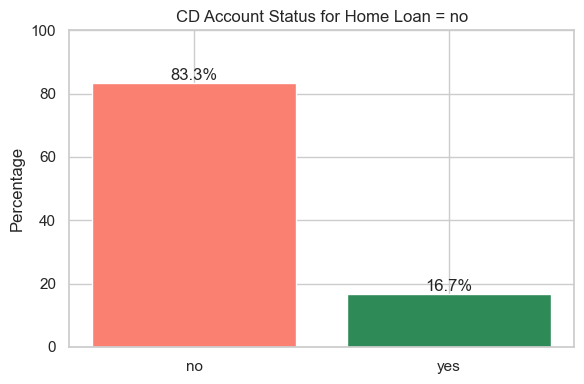

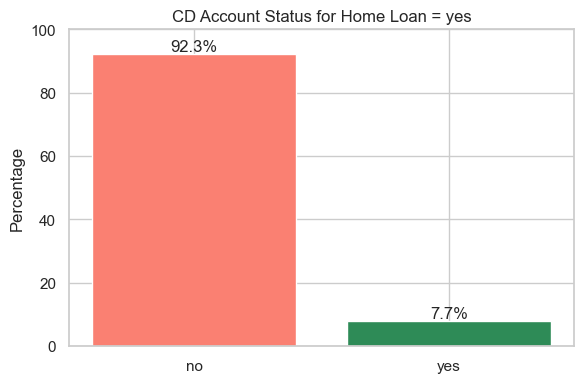

In [55]:

# Step 1: Filter and group the data
grouped = df.groupby(['housing', 'target']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages within each loan group
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 3: Plot one bar chart per loan group
for loan_status in percentages.index:
    plt.figure(figsize=(6, 4))
    values = percentages.loc[loan_status]
    
    bars = plt.bar(values.index, values.values, color=['salmon', 'seagreen'])
    
    # Annotate each bar
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}%', 
                     (bar.get_x() + bar.get_width() / 2, height), 
                     ha='center', va='bottom', fontsize=12)
    
    plt.title(f'CD Account Status for Home Loan = {loan_status}')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

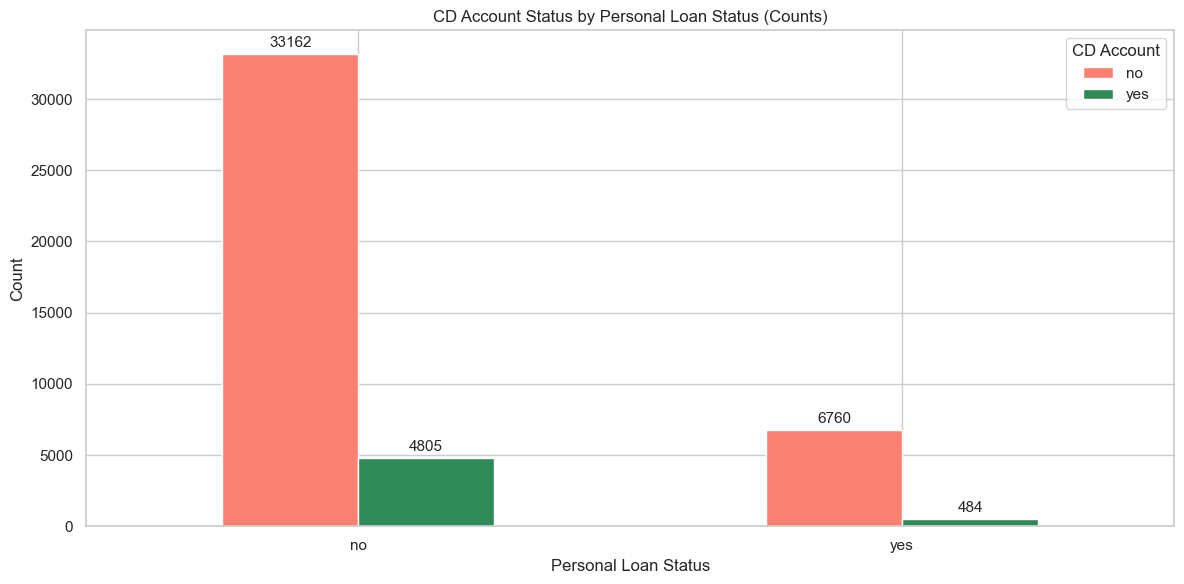

In [56]:
warnings.filterwarnings("ignore", category=SyntaxWarning)

# Step 1: Create a new column combining CD account and loan status
df['cd_personal_loan_group'] = df['target'] + ' | ' + df['loan']

# Step 2: Count occurrences of each combination
group_counts = df['cd_personal_loan_group'].value_counts().sort_index()

# Step 3: Prepare data for grouped bar chart
group_df = group_counts.reset_index()
group_df.columns = ['Group', 'Count']

# Split into two columns: CD status and Loan status
group_df[['CD_Status', 'Loan_Status']] = group_df['Group'].str.split(' \| ', expand=True)

# Pivot for plotting
pivot = group_df.pivot(index='Loan_Status', columns='CD_Status', values='Count')

# Step 4: Plot with annotations
ax = pivot.plot(kind='bar', figsize=(12, 6), color=['salmon', 'seagreen'])

# Add count labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

# Final touches
plt.title('CD Account Status by Personal Loan Status (Counts)')
plt.ylabel('Count')
plt.xlabel('Personal Loan Status')
plt.xticks(rotation=0)
plt.legend(title='CD Account')
plt.tight_layout()
plt.show()

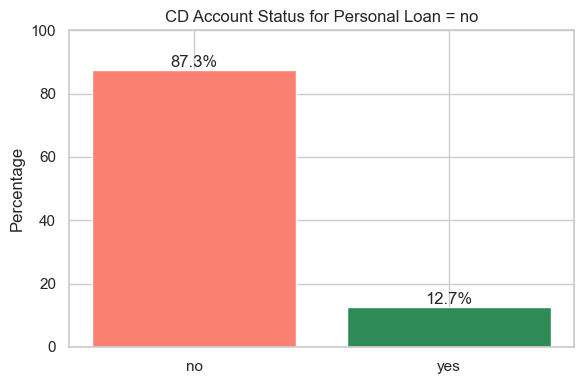

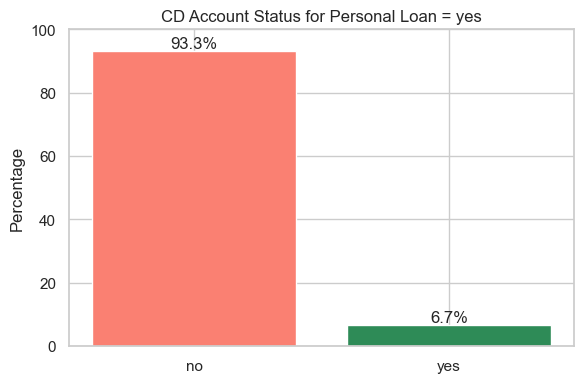

In [57]:
# Step 1: Filter and group the data
grouped = df.groupby(['loan', 'target']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages within each loan group
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 3: Plot one bar chart per loan group
for loan_status in percentages.index:
    plt.figure(figsize=(6, 4))
    values = percentages.loc[loan_status]
    
    bars = plt.bar(values.index, values.values, color=['salmon', 'seagreen'])
    
    # Annotate each bar
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}%', 
                     (bar.get_x() + bar.get_width() / 2, height), 
                     ha='center', va='bottom', fontsize=12)
    
    plt.title(f'CD Account Status for Personal Loan = {loan_status}')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

The last sequence of charts show that those with outstanding personal or housing loans will not open CD accounts at the same rate as those without outstanding personal or housing loans.

# Question 5

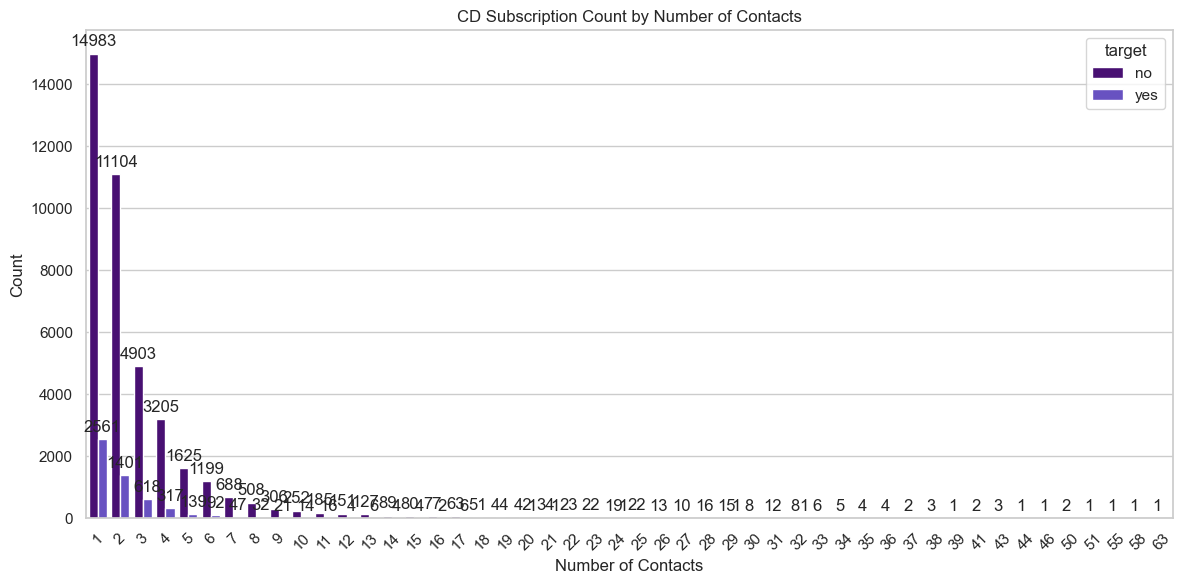

In [58]:
grouped = df.groupby(['campaign', 'target']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped, x='campaign', y='count', hue='target')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Final touches
plt.title('CD Subscription Count by Number of Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

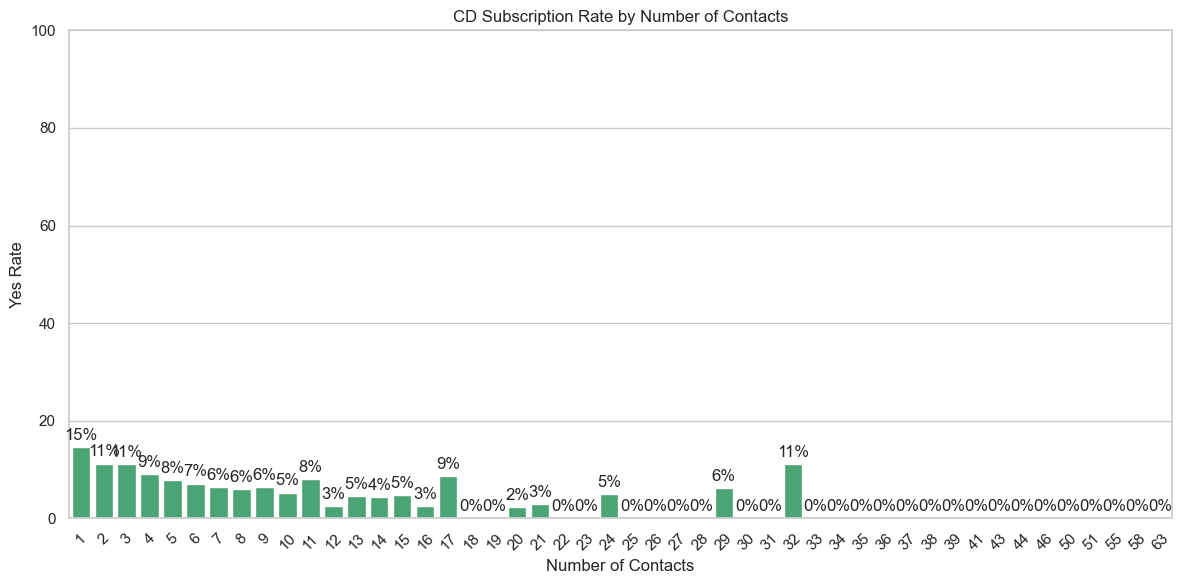

In [59]:
grouped = df.groupby(['campaign', 'target']).size().reset_index(name='count')
pivoted = grouped.pivot(index='campaign', columns='target', values='count').fillna(0)

# Calculate rate of 'yes' responses
pivoted['yes_rate'] = pivoted['yes'] / (pivoted['yes'] + pivoted['no'])
pivoted = pivoted.reset_index()


pivoted['yes_rate'] *= 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=pivoted, x='campaign', y='yes_rate', color='mediumseagreen')

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', padding=3)

# Final touches
plt.title('CD Subscription Rate by Number of Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Yes Rate')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


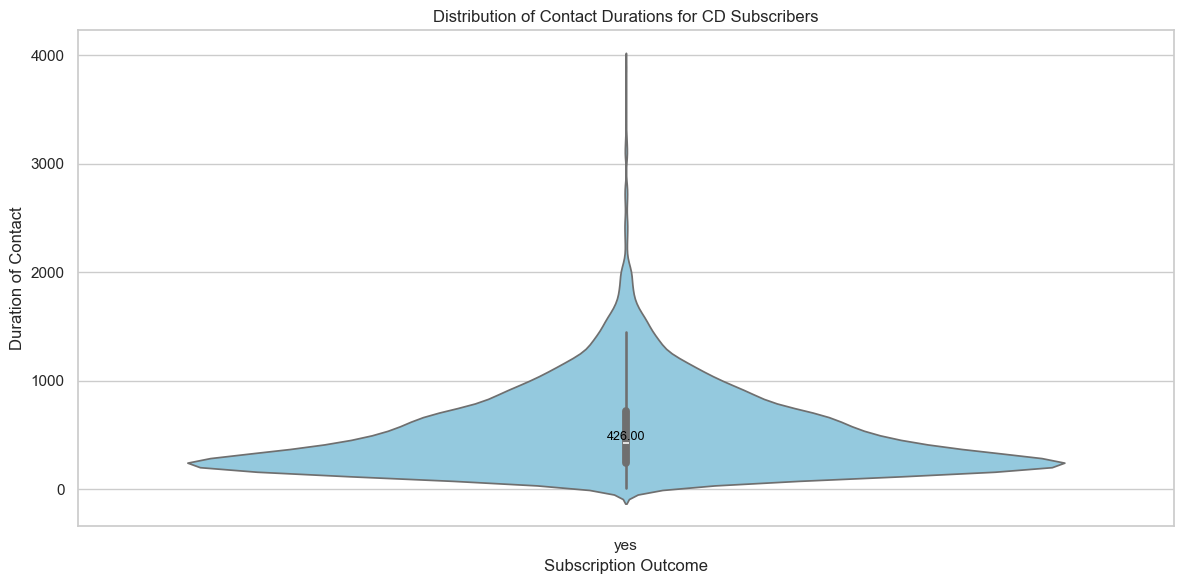

In [60]:

grouped_yes = df[df['target'] == 'yes']

plt.figure(figsize=(12, 6))
sns.violinplot(data=grouped_yes, x='target', y='duration', color ="skyblue")

yes_median = df[df['target'] == 'yes']['duration'].median()
plt.text(0, yes_median, f'{yes_median:.2f}', ha='center', va='bottom', fontsize=9, color='black')

plt.title('Distribution of Contact Durations for CD Subscribers')
plt.xlabel('Subscription Outcome')
plt.ylabel('Duration of Contact')
plt.tight_layout()
plt.show()


As shown from the following charts and plots, the best number of contacts is realitively low with 1 to 3 being the ideal range; anything beyond that range shows diminishing returns. An outlier on 32 contacts is present however it must be noted that only 9 total contacts reached that value and only 1 out of the 9 ended up subscribing showing us the small denominator fallacy. Also for the duration of the contact again it must be noted that less duration is most effective as seen with this violin plot, the median of the duration for people who subscribed is 426 seconds (7 minutes) calls should not last much longer than the median as the returns drastically fall off as duration increases.